In [1]:
import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt

from pymatgen.core import Structure

from FeGB_PtableSeg.plotters import custom_colors, gb_latex_dict, bulk_df, gb_marker_dict

from utils.periodic_table import get_element_number
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_pickle("ptable_Fe_GB_df.pkl.gz", compression="gzip")

# Manuscript plots

## Figure 2

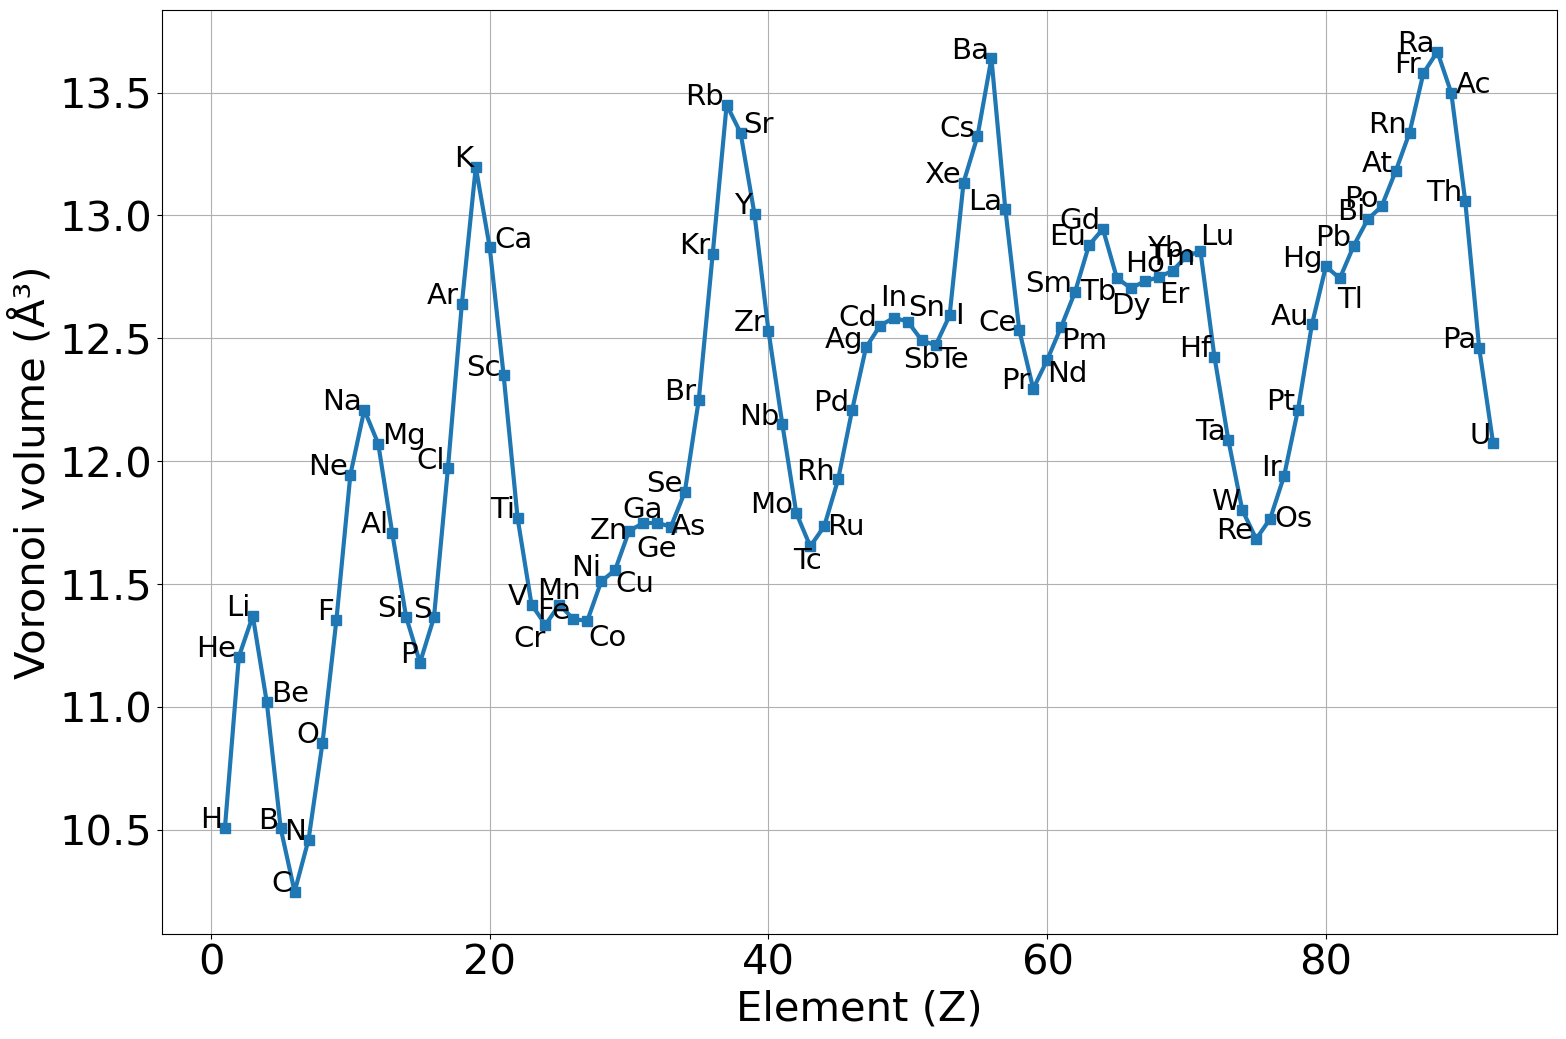

In [3]:
column = "vvol"
# Plotting column against 'Z'
plt.figure(figsize=(18, 12))
plt.plot(bulk_df['Z'], bulk_df[column], marker='s', linewidth = 3, markersize=7)

# Adding a horizontal line
# plt.axhline(y=11.356932331342922, color='r', linestyle='--', label='Fe BCC bulk')
# plt.text(92, 11.356932331342922-0.2, "Fe BCC = 11.35 Å³", fontsize=30, ha='right')

#Labeling points on the plot below each point
element_fontsize = 21
for idx, row in bulk_df.iterrows():
    if row.element == "Mg":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Be":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Ca":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "V":
        plt.text(row['Z']-0.3, row[column], row['element'], fontsize=element_fontsize, ha='right')
    elif row.element == "Cr":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top', ha="right")
    elif row.element == "Mn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="center")
    elif row.element == "Co":
        plt.text(row['Z']+0.1, row[column]-0.01, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Cu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ni":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="right")
    elif row.element == "Zn":
        plt.text(row['Z']-0.1, row[column], row['element'], fontsize=element_fontsize, va='center', ha="right")
    elif row.element == "Ga":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha='center')
    elif row.element == "Ge":
        plt.text(row['Z'], row[column]-0.05, row['element'], fontsize=element_fontsize, va='top', ha='center')
    elif row.element == "As":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Sr":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Tc":
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ru":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va='center')
    elif row.element == "In":
        plt.text(row['Z'], row[column]+0.05, row['element'], fontsize=element_fontsize, ha='center')
    elif row.element == "Sn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='bottom')
    elif row.element == "Sb":
        plt.text(row['Z'], row[column]-0.02, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Te":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "I":
        plt.text(row['Z']+0.4, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Nd":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Pm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Tb":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='right', va="top")
    elif row.element == "Dy":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ho":
        plt.text(row['Z'], row[column]+0.015, row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Er":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "Tm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Lu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="bottom")
    elif row.element == "Os":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Tl":
        plt.text(row['Z']-0.2, row[column]-0.03, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ac":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    else:
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='right')

# Adding labels, title, and grid
plt.xlabel("Element (Z)", fontsize=30)
plt.ylabel("Voronoi volume (Å³)", fontsize=30)
# plt.title(columnvs Atomic Number (Z)", fontsize=24)
plt.grid(True)
# Adjusting tick size
plt.tick_params(axis='x', labelsize=30)  # Adjust x-tick label size
plt.tick_params(axis='y', labelsize=30)  # Adjust x-tick label size

## Figure 3

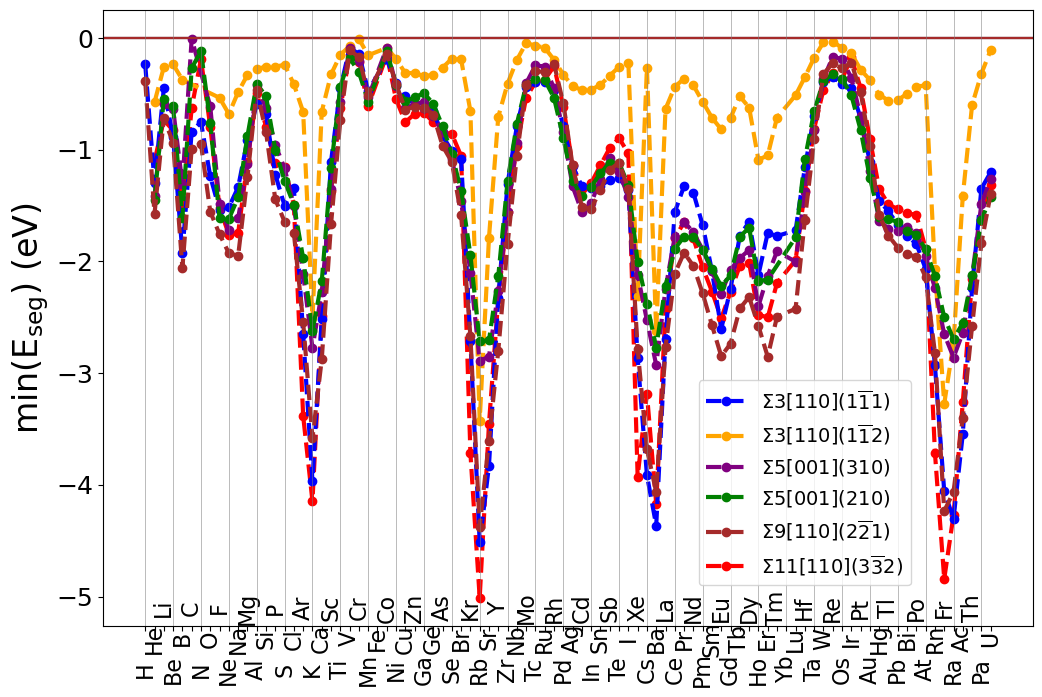

In [4]:
from FeGB_PtableSeg.plotters import plot_minEseg_prop_vs_Z

fig = plot_minEseg_prop_vs_Z(df,
                        y_prop="E_seg",
                      x_prop="Z",
                      ylabel=r"$\rm{min}(E_{\rm{seg}})$ (eV)",
                      figsize=(12, 8),
                      shift_xticks=True,
                      xlabel_fontsize=24,
                      xtick_yshift = -0.045,
                      ylabel_fontsize=24,
                      xtick_fontsize=16,
                      ytick_fontsize=18,
                      legend_fontsize=14)

## Figure 4 - maximum segregation binding vs Voronoi volume in bulk

In [5]:
mineseg_df = []
# Looping over each unique "GB" group
for idx, (gb, group) in enumerate(df.dropna(subset=["E_seg"]).groupby("GB")):
    # For each "GB" group, group by "element" and find the minimum "Eseg"
    min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
    min_eseg_per_element = min_eseg_per_element[min_eseg_per_element['E_seg'] <= 0]
    min_eseg_per_element = min_eseg_per_element.reset_index(drop=True).merge(bulk_df[["vvol", "element"]], on = "element")
    mineseg_df.append(min_eseg_per_element)
mineseg_df = pd.concat(mineseg_df)
# vertical Fe line at Fe VorVol
# Get the Voronoi volume for Fe from bulk_df
fe_vvol = bulk_df[bulk_df["element"] == "Fe"].vvol.values[0]

# Filter mineseg_df for rows where 'vvol' is within 0.2 of Fe's Voronoi volume
filtered_mineseg_df = mineseg_df[(mineseg_df["vvol"] >= fe_vvol - 0.2) & (mineseg_df["vvol"] <= fe_vvol + 0.2)]

# Display the filtered rows
filtered_mineseg_df[["element", "GB", "E_seg", "vvol"]]


/tmp/ipykernel_29831/798522665.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_29831/798522665.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_29831/798522665.py:5: DeprecationWa

element               GB     E_seg    vvol
17      Co  S11_RA110_S3_32 -0.154494  11.351
18      Cr  S11_RA110_S3_32 -0.214218  11.335
20      Cu  S11_RA110_S3_32 -0.753652  11.558
24       F  S11_RA110_S3_32 -1.518137  11.355
29      He  S11_RA110_S3_32 -1.102779  11.205
..     ...              ...       ...     ...
50      Ni   S9_RA110_S2_21 -0.416380  11.511
53       P   S9_RA110_S2_21 -1.445304  11.181
67       S   S9_RA110_S2_21 -1.643592  11.365
71      Si   S9_RA110_S2_21 -0.840507  11.367
84       V   S9_RA110_S2_21 -0.110203  11.417

[72 rows x 4 columns]

/tmp/ipykernel_29831/1419261552.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_29831/1419261552.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_29831/1419261552.py:6: Deprecatio

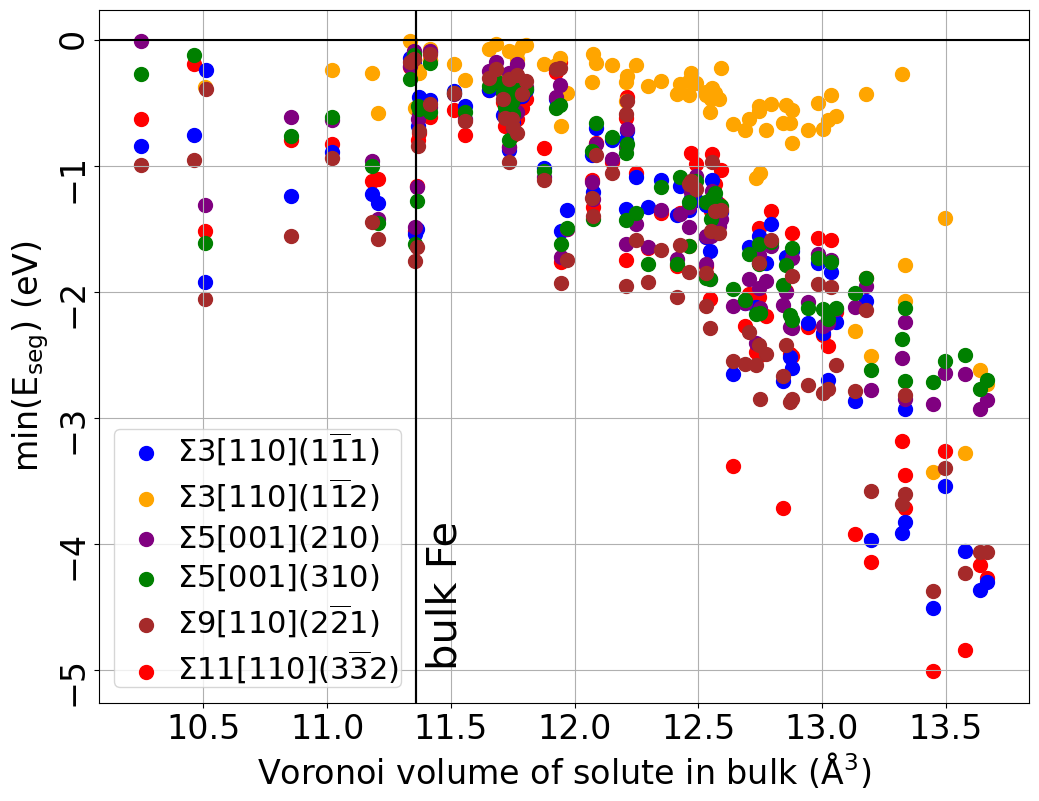

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 9))
gb_legends = []
# Looping over each unique "GB" group
for idx, (gb, group) in enumerate(df.dropna(subset=["E_seg"]).groupby("GB")):
    # For each "GB" group, group by "element" and find the minimum "Eseg"
    min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
    min_eseg_per_element = min_eseg_per_element[min_eseg_per_element['E_seg'] <= 0]
    min_eseg_per_element = min_eseg_per_element.reset_index(drop=True).merge(bulk_df[["vvol", "element"]], on = "element")

    x_values = min_eseg_per_element['vvol']  # "VorVol" values for x-axis
    y_values = min_eseg_per_element['E_seg']  # Corresponding "E_seg" values, can change this to any column in df, i.e. R_

    # Plot for "E_seg" on the primary y-axis
    line1= ax1.scatter(x_values, y_values, color=custom_colors[gb], marker="o", s=100)

    gb_legends.append((line1, f'{gb_latex_dict[gb]}'))
    
gb_legends.append(gb_legends.pop(0))
# Set labels and axis
ax1.set_ylabel(r"min$(\rm{E}_{\rm{seg}})$ (eV)", fontsize=24)
ax1.set_xlabel(r"Voronoi volume of solute in bulk ($\rm{\AA}^3$)", fontsize=24)

ax1.tick_params(axis='y', labelsize=24, rotation=90)
ax1.tick_params(axis='x', labelsize=24)

# horizontal ref line at 0 E_seg
ax1.axhline(0, color="k")
# vertical Fe line at Fe VorVol
ax1.axvline(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0], color="k")
ax1.text(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0]+0.2, -5, "bulk Fe", verticalalignment='bottom', horizontalalignment='right', rotation='vertical', fontsize=30)

ax1.axvline(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0], color="k")
ax1.grid(which="major")

gb_legend = plt.legend(*zip(*gb_legends), loc='lower left', fontsize=22, handletextpad=0.01, borderpad=0.05, labelspacing=0.3)

## Figure 5

In [7]:
from scipy.stats import pearsonr, spearmanr

VorVol_Eseg_corrlist = []
magmom_Eseg_corrlist = []
VorVol_magmom_corrlist = []
element_str_list = []

for element_str, element_df in df.groupby("element"):
    element_df = element_df[element_df["VorNN_tot_vol"] < 40]

    try:
        pearson_corr, _ = pearsonr(element_df.VorNN_tot_vol.values, element_df.E_seg.values)
        spearman_corr, _ = spearmanr(element_df.VorNN_tot_vol.values, element_df.E_seg.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    VorVol_Eseg_corrlist.append((pearson_corr, spearman_corr))
    
    try:
        pearson_corr, _ = pearsonr(element_df.magmom_solute.values, element_df.E_seg.values)
        spearman_corr, _ = spearmanr(element_df.magmom_solute.values, element_df.E_seg.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    magmom_Eseg_corrlist.append((pearson_corr, spearman_corr))
    
    try:
        pearson_corr, _ = pearsonr(element_df.VorNN_tot_vol.values, element_df.magmom_solute.values)
        spearman_corr, _ = spearmanr(element_df.VorNN_tot_vol.values, element_df.magmom_solute.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    VorVol_magmom_corrlist.append((pearson_corr, spearman_corr))
    
    element_str_list.append(element_str)

corr_r_vvol_eseg = dict(zip(element_str_list, VorVol_Eseg_corrlist))
corr_r_magmom_Eseg = dict(zip(element_str_list, magmom_Eseg_corrlist))
corr_vvol_magmom = dict(zip(element_str_list, VorVol_magmom_corrlist))

bulk_df["pearson_r_vvol_eseg"] = [corr_r_vvol_eseg[row.element][0] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_vvol_eseg"] = [corr_r_vvol_eseg[row.element][1] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["pearson_r_magmom_Eseg"] = [corr_r_magmom_Eseg[row.element][0] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_magmom_Eseg"] = [corr_r_magmom_Eseg[row.element][1] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["pearson_r_vvol_magmom"] = [corr_vvol_magmom[row.element][0] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_vvol_magmom"] = [corr_vvol_magmom[row.element][1] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]

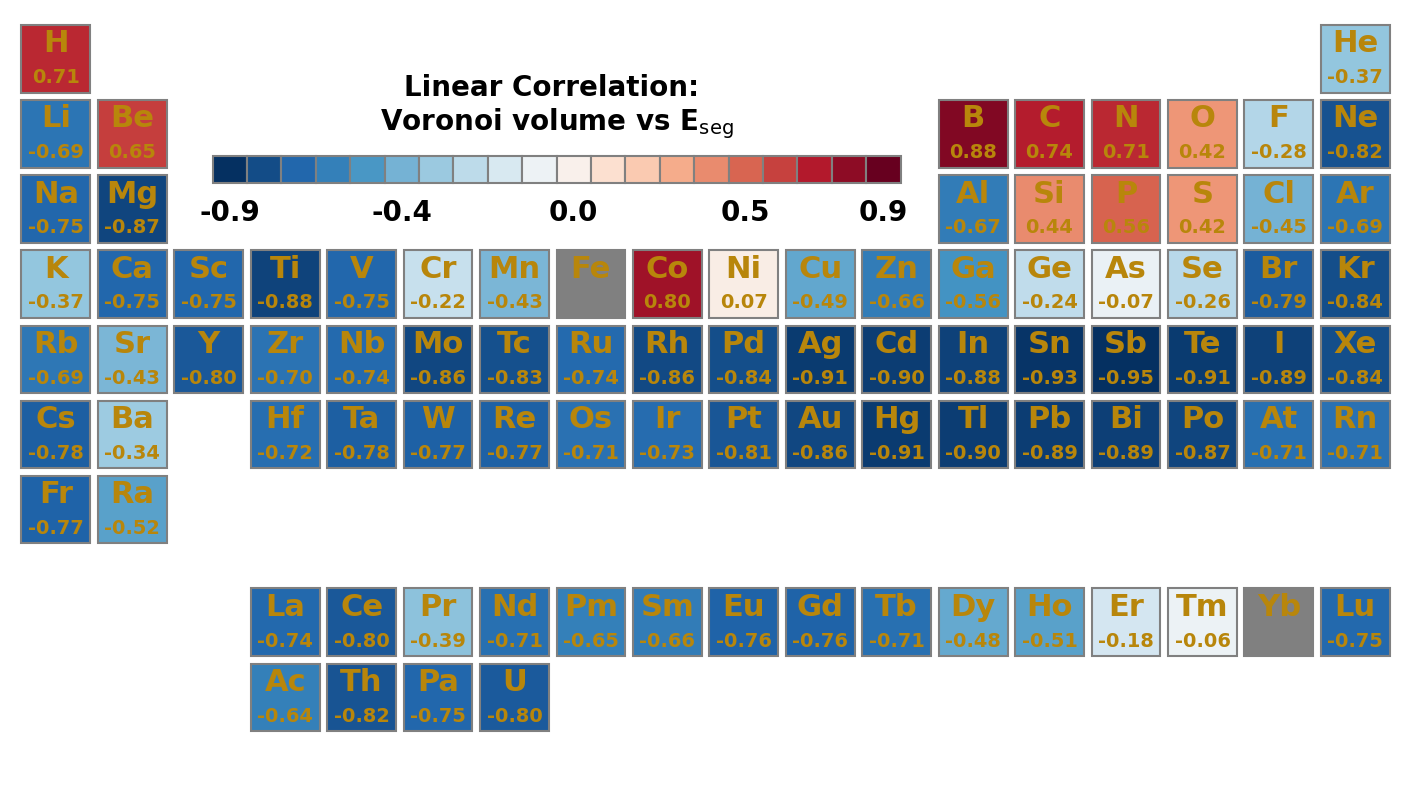

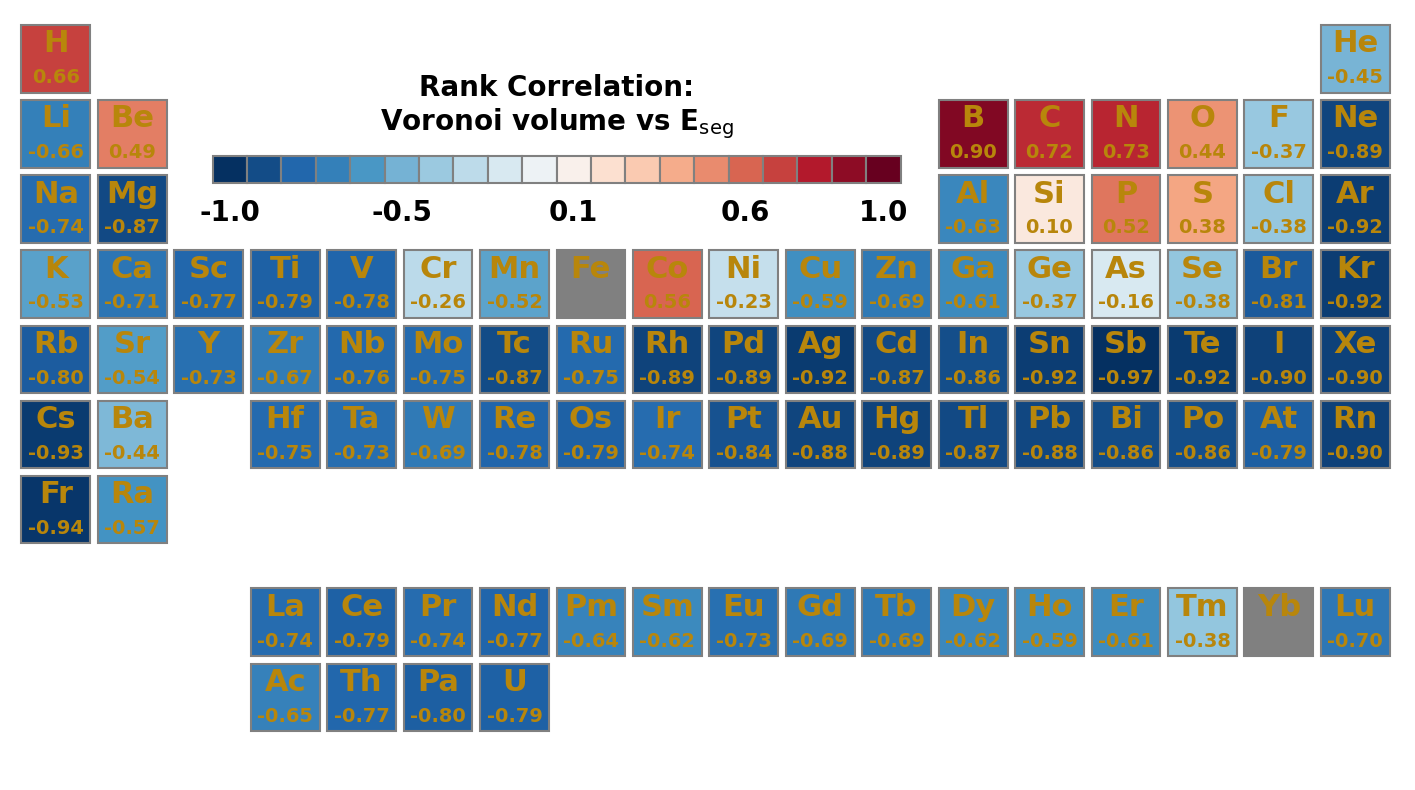

In [8]:
import matplotlib.cm as cm
from FeGB_PtableSeg.plotters import periodic_table_plot

# Also try pearson_r_magmom_Eseg, pearson_r_vvol_magmom to see their correlations too!

fig, ax = periodic_table_plot(bulk_df,
                    "pearson_r_vvol_eseg",
                    center_cm_zero=True,
                    cmap = cm.RdBu_r,
                    property_name=r"Linear Correlation: " + "\n"+r"Voronoi volume vs E$_{\rm seg}$"
                    )

fig, ax = periodic_table_plot(bulk_df,
                    "spearman_r_vvol_eseg",
                    center_cm_zero=True,
                    cmap = cm.RdBu_r,
                    property_name=r"Rank Correlation:" + "\n"+r"Voronoi volume vs E$_{\rm seg}$")

## Preparation for spectral plots

This reshapes the df to contain the site-spectra for both segregagtion energy and cohesive effects in rows

1 row -> 1 GB+element combination

In [9]:
df_spectra_lst = []

for gb, gb_df in df[df["dist_GB"] < 3.5].groupby("GB"):
    for element, element_df in gb_df.groupby("element"):
        element_df = element_df.dropna(subset=["structure"])
        element_df = element_df.reset_index(drop=True)
        unique_site_spectra = element_df.E_seg.values
        element_seg_spectra = []
        element_coh_min_ANSBO_spectra =[]
        element_coh_min_wsep_spectra = []
        element_df["eta_min_R_ANSBO"] = element_df.R_DDEC6_ANSBO.values - 1
        element_df["eta_min_R_Wsep_RGS"] = element_df.R_Wsep_RGS.values - 1
        for _, site_row in element_df.iterrows():
            element_seg_spectra += [site_row.E_seg] * int(site_row.site_multiplicity)
            element_coh_min_ANSBO_spectra += [site_row.eta_min_R_ANSBO] * int(site_row.site_multiplicity)
            element_coh_min_wsep_spectra += [site_row.eta_min_R_Wsep_RGS] * int(site_row.site_multiplicity)
        df_spectra_lst.append([gb,
                           element,
                           element_df.Z.values[0],
                           element_df.site.values,
                           element_df.site_multiplicity.values,
                           element_seg_spectra,
                           unique_site_spectra,
                           element_coh_min_ANSBO_spectra,
                           element_df.eta_min_R_ANSBO.values,
                           element_coh_min_wsep_spectra,
                            element_df.eta_min_R_Wsep_RGS.values])
df_spectra = pd.DataFrame(df_spectra_lst, columns = ["GB",
                                    "element",
                                    "Z",
                                    "unique_sites",
                                    "site_multiplicity",
                                    "full_seg_spectra",
                                    "unique_seg_spectra",
                                    "eta_coh_ANSBO_spectra",
                                    "unique_eta_ANSBO_spectra",
                                    "eta_coh_wsep_spectra",
                                    "unique_eta_wsep_spectra"])

## Figure 6

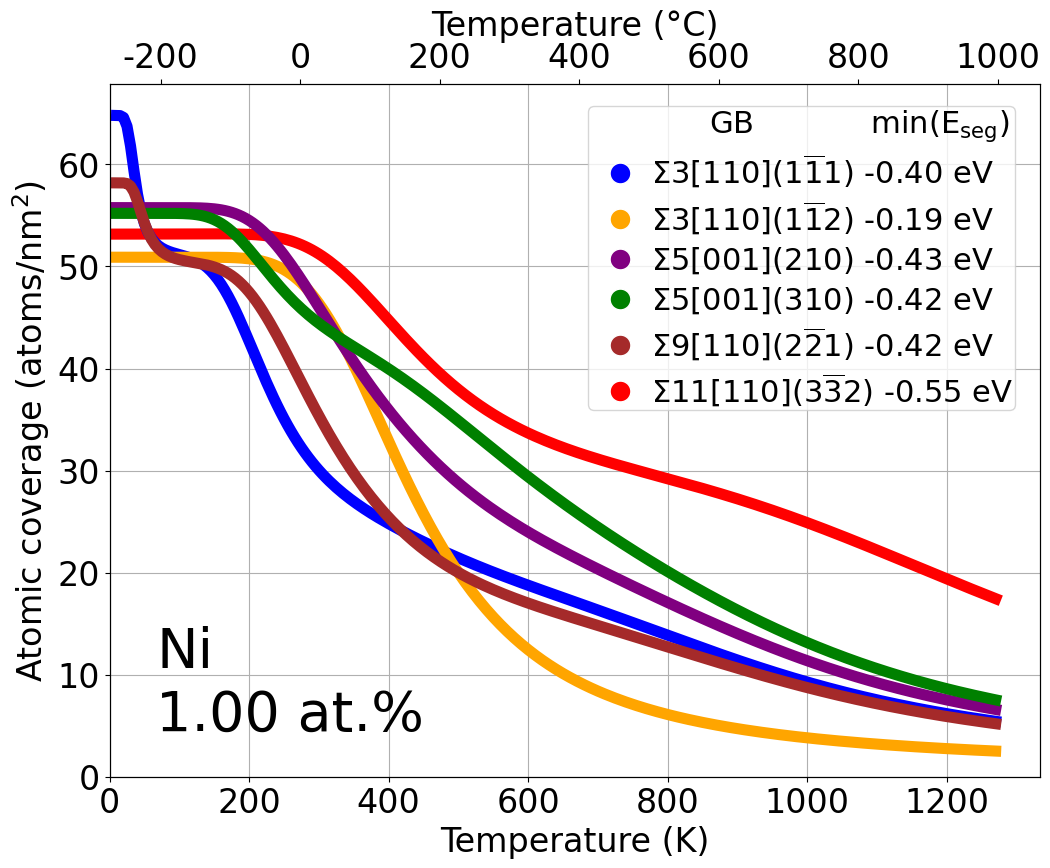

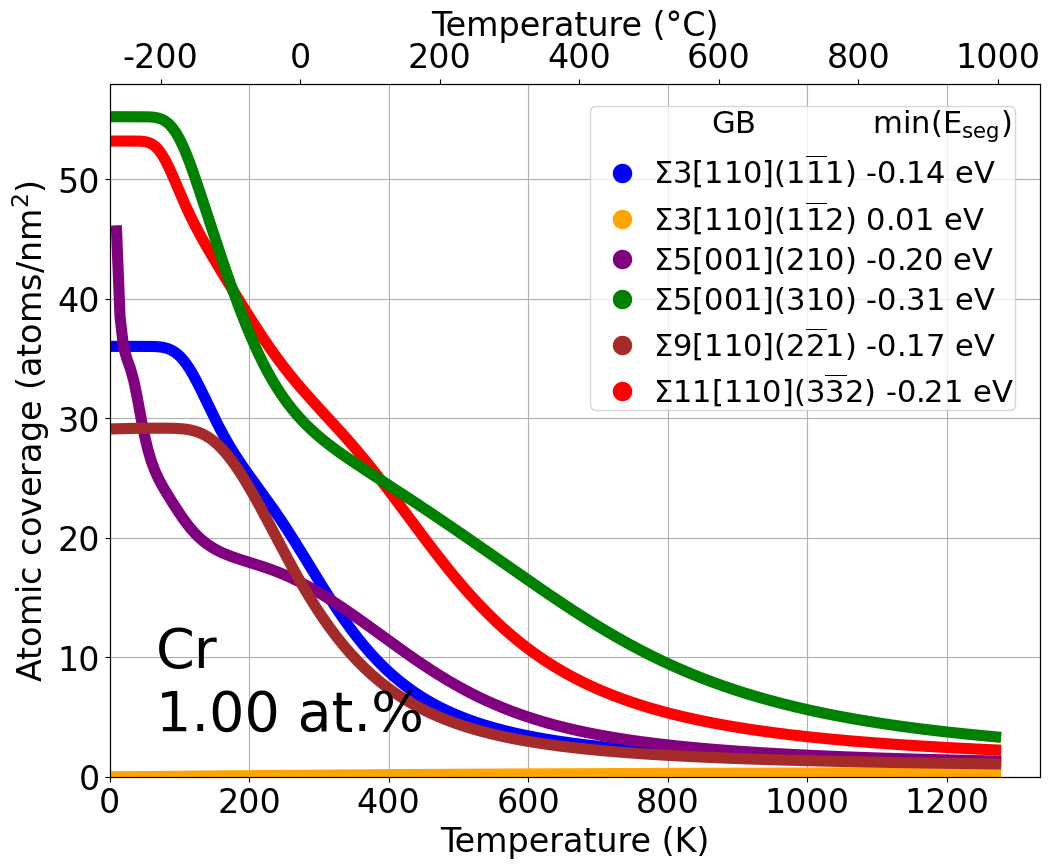

In [10]:
from FeGB_PtableSeg.plotters import plot_coverage_vs_temperature
#alloy_conc = [0.1, 0.5, 1, 2, 3, 4, 5, 10]
alloy_conc = [1]

temperature_range = np.arange(10, 1273, 5)
elements = ["Ni", "Cr"]
for conc in alloy_conc:
    if conc == 1:
        close_fig=False
    else:
        close_fig=True
    for element in elements:
        fig, ax = plot_coverage_vs_temperature(df, df_spectra, conc, temperature_range, element, close_fig=close_fig)

## Figure 7a

/root/personal_python_utilities/utils/utils/plotters/grid_plots.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cm.set_ticklabels(


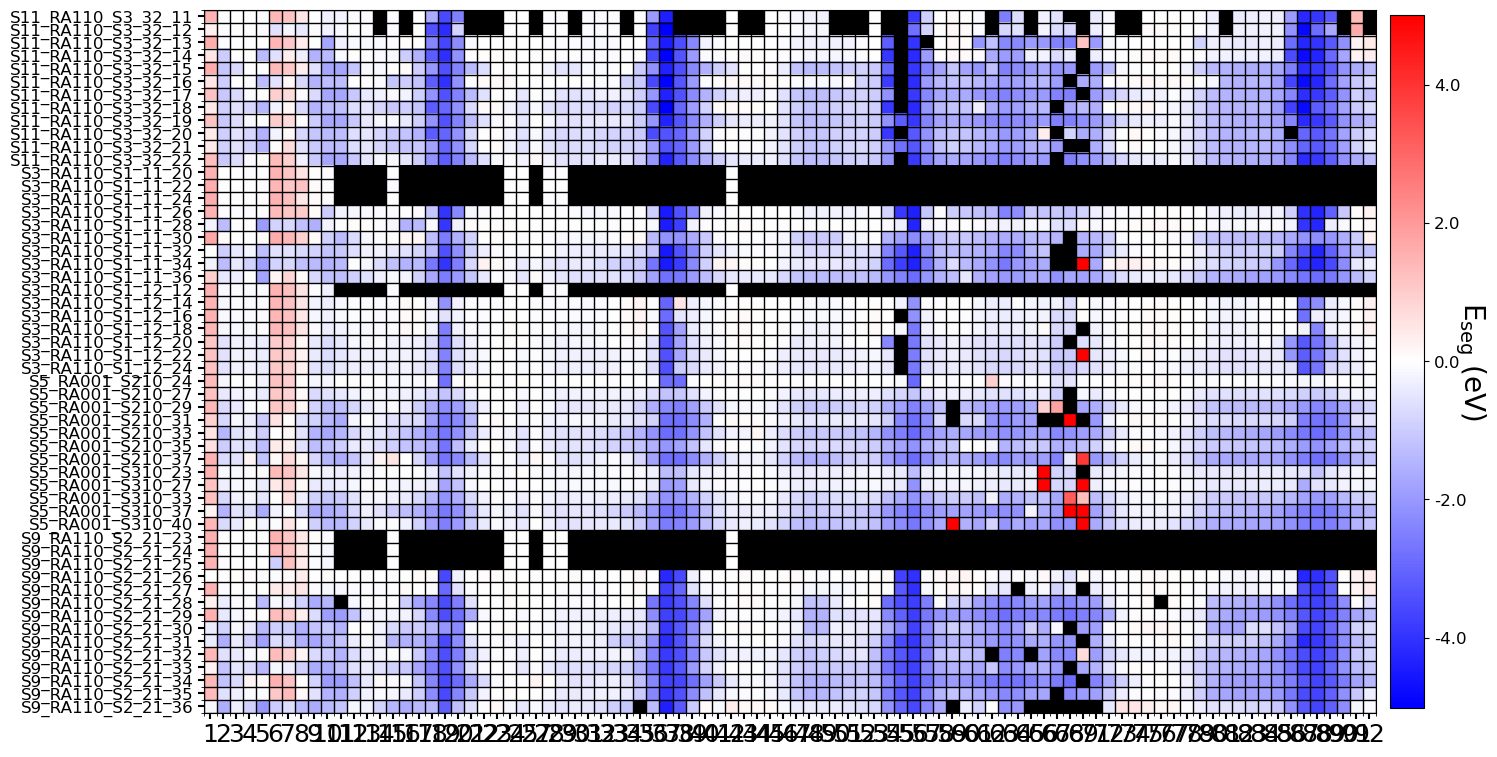

In [11]:
from utils.plotters.grid_plots import plot_pivot_table

fig, axs = plot_pivot_table(df.pivot_table(values='E_seg', index='GB_site', columns='Z'))

# This bit deals with the structure-sites that we don't want to include due to us excluding sites that are too far away in some elements deliberately
ids_to_drop = ['S11_RA110_S3_32_11', 'S11_RA110_S3_32_12', 'S3_RA110_S1_11_20', 'S3_RA110_S1_11_22', 'S3_RA110_S1_11_24', 'S3_RA110_S1_12_12', 'S9_RA110_S2_21_23', 'S9_RA110_S2_21_24', 'S9_RA110_S2_21_25']
df_plot = df.copy()
df_plot = df_plot[~df_plot['GB_site'].isin(ids_to_drop)]
gb_site_Z_Eseg_pivot = df_plot.pivot_table(values='E_seg', index='GB_site', columns='Z')

nan_points = [(index, col) for index in gb_site_Z_Eseg_pivot.index for col in gb_site_Z_Eseg_pivot.columns if np.isnan(gb_site_Z_Eseg_pivot.at[index, col])]
nan_segregation = []
for GB_site, Z in nan_points:
    # print(GB_site, Z)
    nan_segregation.append(("_".join(GB_site.split("_")[:-1])+f"_{int(Z)}"))
nan_segregation = np.unique(nan_segregation)

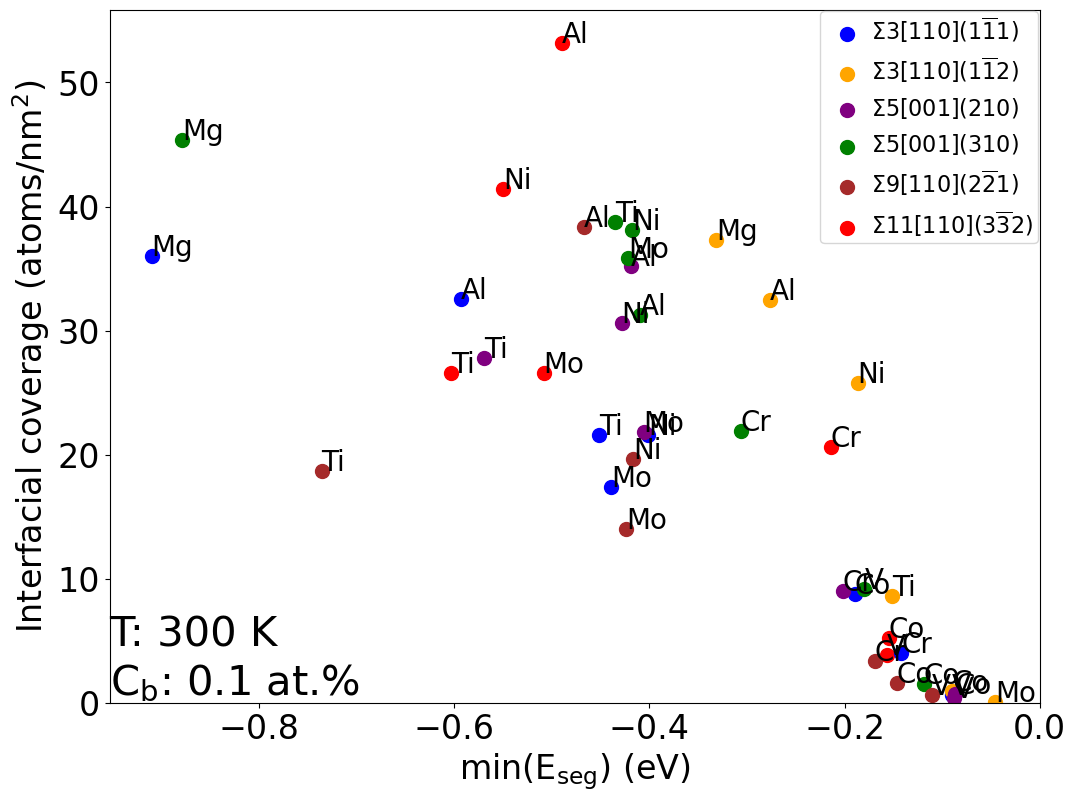

In [12]:
from FeGB_PtableSeg.plotters import plot_interfacial_coverage_vs_minEseg
fig, ax = plot_interfacial_coverage_vs_minEseg(df,
                                    df_spectra,
                                    ["Ni", "Cr", "Co", "Mo", "Ti", "V", "Al", "Mg"],
                                    atomic_pct_conc=0.1, # 0.1 at. % 
                                    temp=300, # 300 K
                                    nan_segregation=nan_segregation, # Spectra with at least 1 non-converged value are not plottable
                                    gb_latex_dict=gb_latex_dict,
                                    custom_colors=custom_colors)


## Figure 7b

In [13]:
from FeGB_PtableSeg.plotters import plot_Eseg_vs_temperature

In [14]:
def calculate_effective_temperature_eseg(y, T, cB, kB=8.6173303e-05):
    """
    Calculate the effective segregation energy Eseg of the spectra from the given parameters.

    Parameters:
    y (float): The term from the equation.
    T (float): The temperature in Kelvin.
    cB (float): The concentration of B.
    kB (float): The Boltzmann constant, default 1.38e-23 J/K.

    Returns:
    float: The calculated segregation energy Eseg in Joules.
    """
    if y * cB - cB == 0:
        return np.nan
        #raise ValueError("The denominator becomes zero, adjust your input values.")
    
    numerator = y * cB - y
    denominator = y * cB - cB
    Eseg = -kB * T * np.log(numerator / denominator)
    return Eseg

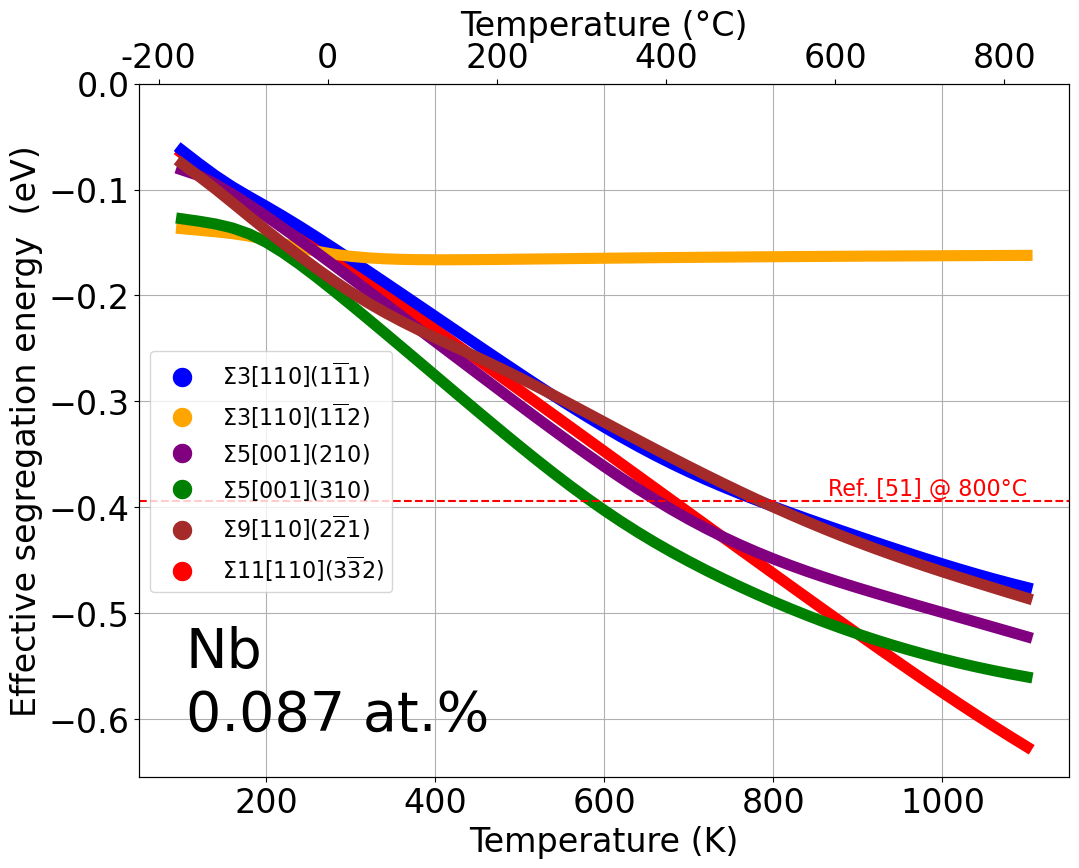

In [15]:
element = "Nb"
fig, ax1 = plot_Eseg_vs_temperature(df_spectra,
                                    element,
                                    gb_latex_dict,
                                    custom_colors,
                                    alloy_conc=0.01 * 0.087,
                                    temp_range=(100, 1100),
                                    temp_step=20,
                                    legend_loc='lower left',
                                    legend_bbox_to_anchor=(0.00, 0.25))

# Add the reference line
reference_value = -38 / 96.485
_ = ax1.axhline(reference_value, c="r", linestyle="--")

# Add text above the reference line
ax1.text(1100, reference_value,  "Ref. [51] @ 800°C", color="r", fontsize=16, verticalalignment='bottom', horizontalalignment='right')

# Adjust the y-axis limit
_ = ax1.set_ylim([None, 0])
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/EffectiveSegregationEnergy/EffectiveSegregationEnergy_vs_temp_{element}.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)

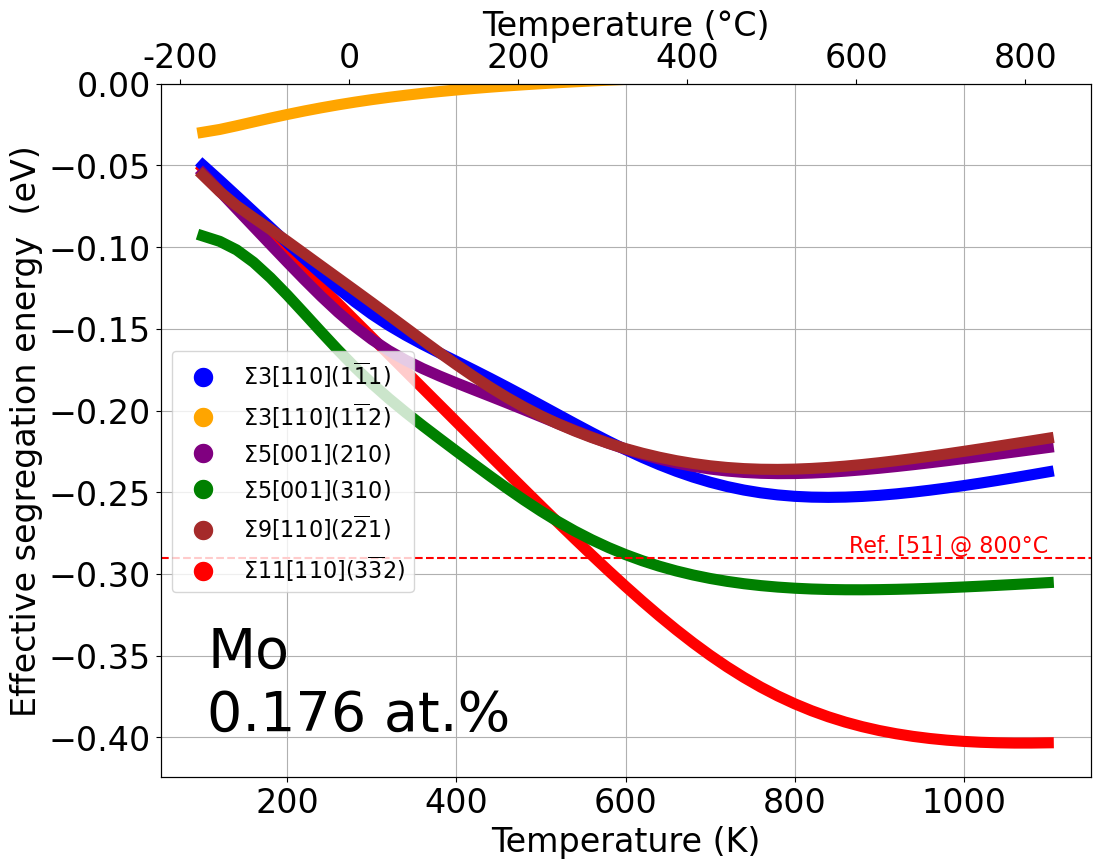

In [16]:
element = "Mo"
fig, ax1 = plot_Eseg_vs_temperature(df_spectra,
                                    element,
                                    gb_latex_dict,
                                    custom_colors,
                                    alloy_conc=0.01 * 0.176,
                                    temp_range=(100, 1100),
                                    temp_step=20,
                                    legend_loc='lower left',
                                    legend_bbox_to_anchor=(0.00, 0.25))

# Add the reference line
reference_value = -28 / 96.485
_ = ax1.axhline(reference_value, c="r", linestyle="--")

# Add text above the reference line
ax1.text(1100, reference_value,  "Ref. [51] @ 800°C", color="r", fontsize=16, verticalalignment='bottom', horizontalalignment='right')

# Adjust the y-axis limit
_ = ax1.set_ylim([None, 0])
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/EffectiveSegregationEnergy/EffectiveSegregationEnergy_vs_temp_{element}.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 8

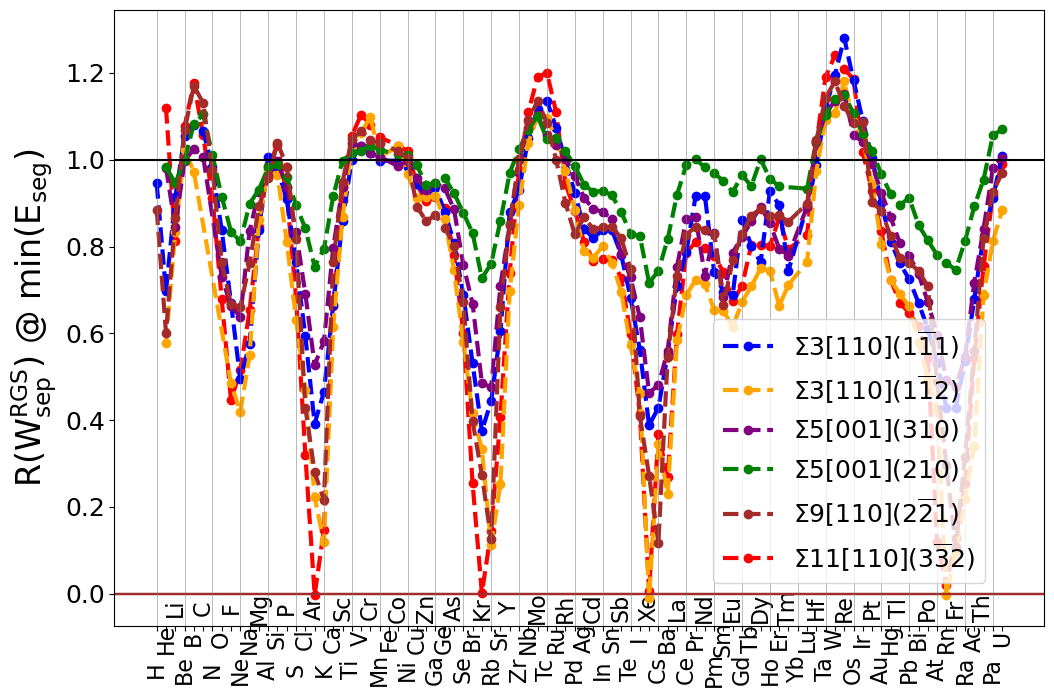

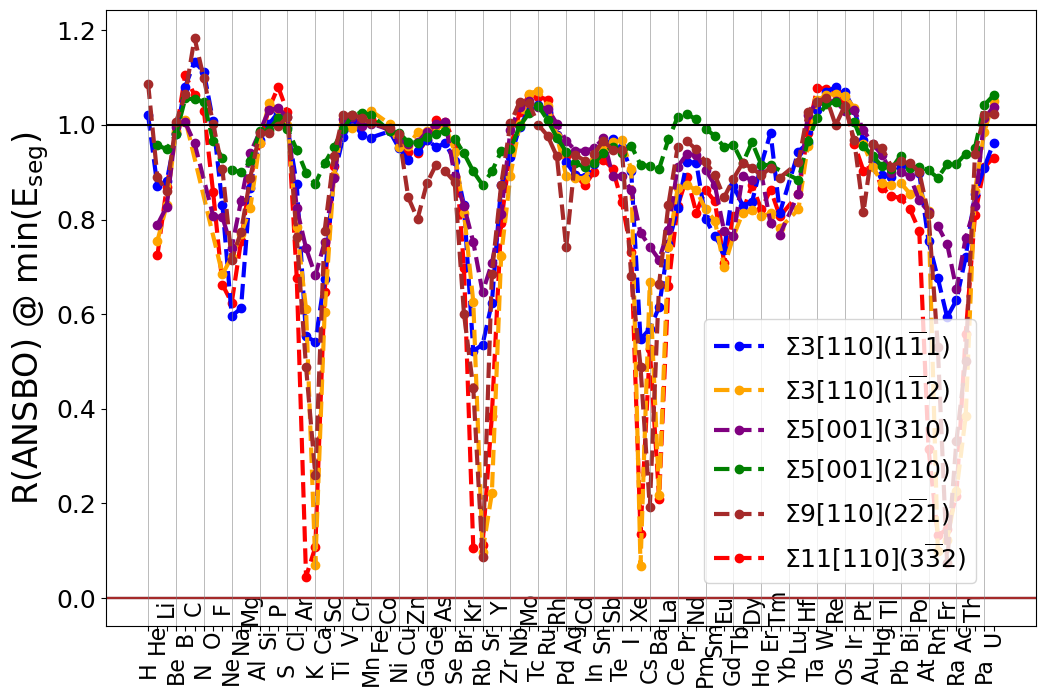

In [17]:
# 8a Wsep
fig, ax1 = plot_minEseg_prop_vs_Z(df[df["E_seg"] < 0],
                        y_prop="R_Wsep_RGS", # Adjust this to be Wsep_RGS_min for absolute values
                      x_prop="Z",
                      ylabel=r"R(W$_{\rm{sep}}^{\rm{RGS}})$ @ $\rm{min}(E_{\rm{seg}})$",
                      figsize=(12, 8),
                      shift_xticks=True,
                      xlabel_fontsize=24,
                      xtick_yshift = -0.045,
                      ylabel_fontsize=24,
                      xtick_fontsize=16,
                      ytick_fontsize=18,
                      legend_fontsize=18)
_ = ax1.axhline(1, color="k", linestyle="-")

# 8b ANSBO
fig, ax1 = plot_minEseg_prop_vs_Z(df,
                        y_prop="R_DDEC6_ANSBO", # Adjust this to be DDEC6_ANSBO_min for absolute values
                      x_prop="Z",
                      ylabel=r"R(ANSBO) @ $\rm{min}(E_{\rm{seg}})$",
                      figsize=(12, 8),
                      shift_xticks=True,
                      xlabel_fontsize=24,
                      xtick_yshift = -0.045,
                      ylabel_fontsize=24,
                      xtick_fontsize=16,
                      ytick_fontsize=18,
                      legend_fontsize=18)
_ = ax1.axhline(1, color="k", linestyle="-")

## Figure 9a

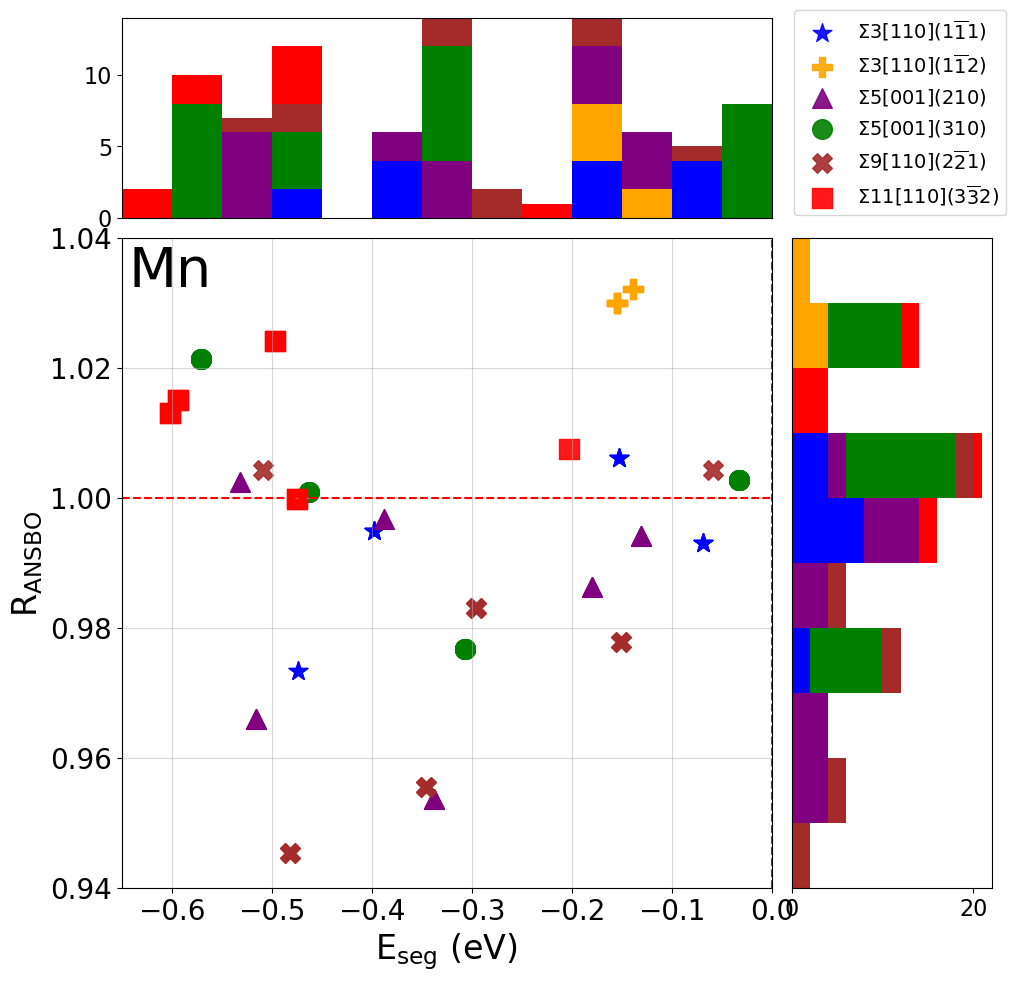

In [18]:
from FeGB_PtableSeg.plotters import plot_x_y_whist_spectra
props = ["R_DDEC6_ANSBO", "R_wsep", "eta_min_ANSBO", "eta_min_wsep_RGS", "DDEC6_min_ANSBO", "Wsep_RGS_min"]
prop_labels = [
    r"$\rm{R}_{\rm{ANSBO}}$", 
    r"$\rm{R}_{\rm{W}_{\rm{sep}}}$", 
    r"$\eta_{\rm{ANSBO}}$ (ANSBO)", 
    r"$\eta_{\rm{W}_{\rm{sep}}}$ (J/m$^2$)", 
    "DDEC6 ANSBO", 
    r"W$_{\rm{sep}}$ (J/m$^2$)"
]
prop_label_dict = dict(zip(props, prop_labels))
x_prop = "E_seg"
y_prop = props[0]
element = "Mn"
fig, ax = plot_x_y_whist_spectra(df=df[(df["element"] == element) & (df["E_seg"] < 0) & (df["dist_GB"] < 3.5)].dropna(subset="R_DDEC6_ANSBO"),
                    x=x_prop,
                    y=y_prop,
                    close_fig=False,
                    xlabel=r"$\rm{E}_{\rm{seg}}$ (eV)",
                    ylabel=prop_label_dict[y_prop],
                    xlabel_fontsize=24,
                    ylabel_fontsize=24,
                    legend_fontsize=14,
                    bin_width_x=0.05,
                    bin_width_y=0.01,
                    hist_ticksize=16,
                    title=element,
                    title_fontsize=40,
                    mask_limits=None)
_ = ax.axhline(y=1.0, color="r", linestyle="--")
_ = ax.axvline(x=0, color="r", linestyle="--")

## Figure 9b

## Figure 9c

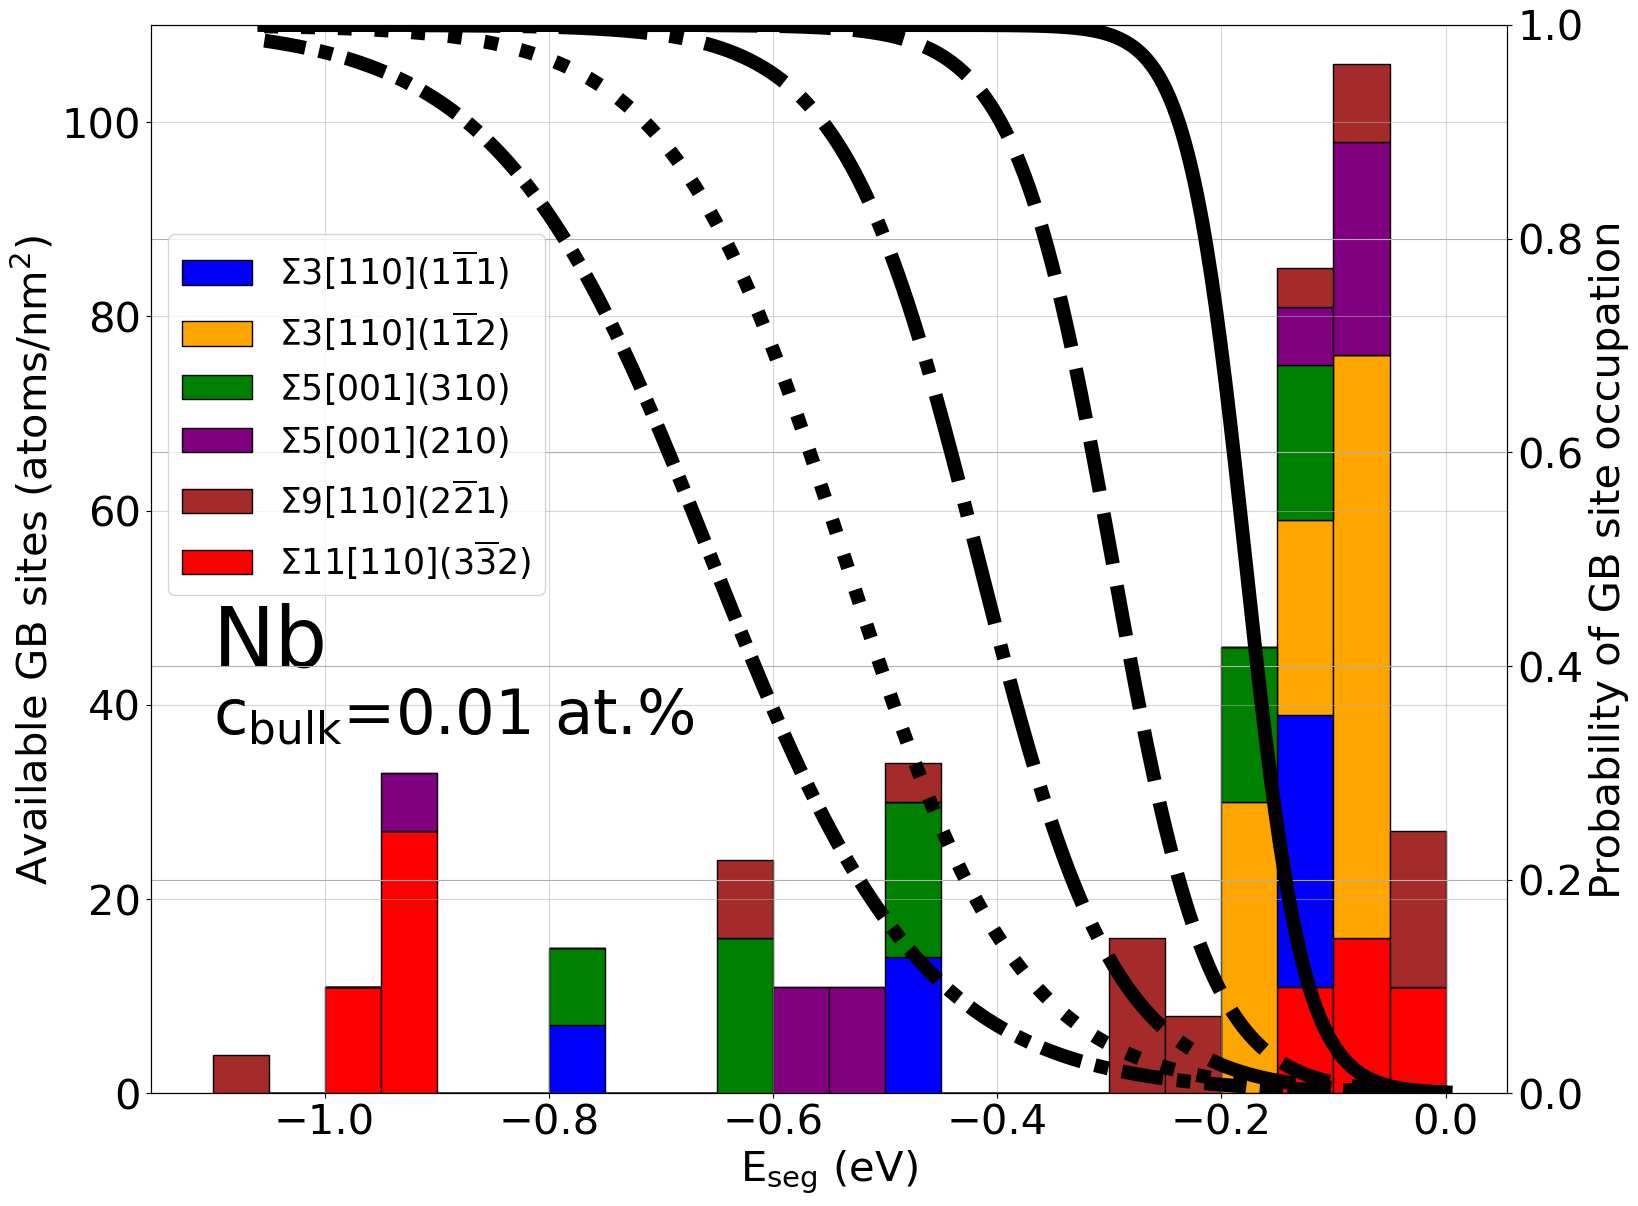

In [19]:
from FeGB_PtableSeg.plotters import plot_gb_histogram_with_cGB

# Set element and plot parameters
element = 'Nb'
fig, ax, ax2 = plot_gb_histogram_with_cGB(
    df,
    element=element,
    c_bulk=0.001,
    temperatures=[300, 500, 700, 900, 1100],
    ylims_hist=(0, 110),
    ylims_cGB=(0, 1.0),
    ylabel=r"Available GB sites (atoms/nm$^2$)",
    ylabel_fontsize=30,
    ylabel2="Probability of GB site occupation",
    ylabel2_fontsize=30,
    legend_fontsize=25,
    legend_loc=(0.0, 0.45),
    xlabel_fontsize=30,
    custom_colors=custom_colors,
    gb_latex_dict=gb_latex_dict
)

# Add text at the bottom left of ax2
ax.text(s=r"Nb", x=-1.1, y=44, fontsize=60)
ax.text(s=r"c$_{\rm{bulk}}$=0.01 at.%", x=-1.1, y=37, fontsize=45)

# Set font size for axis ticks
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)

# Define save path and save the figure
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/SiteEsegDOS_LangmuirDistribution_{element}.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)


/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:828: RuntimeWarning: divide by zero encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:829: RuntimeWarning: divide by zero encountered in divide
  (1 - c_bulk + c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature))))
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:828: RuntimeWarning: invalid value encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),


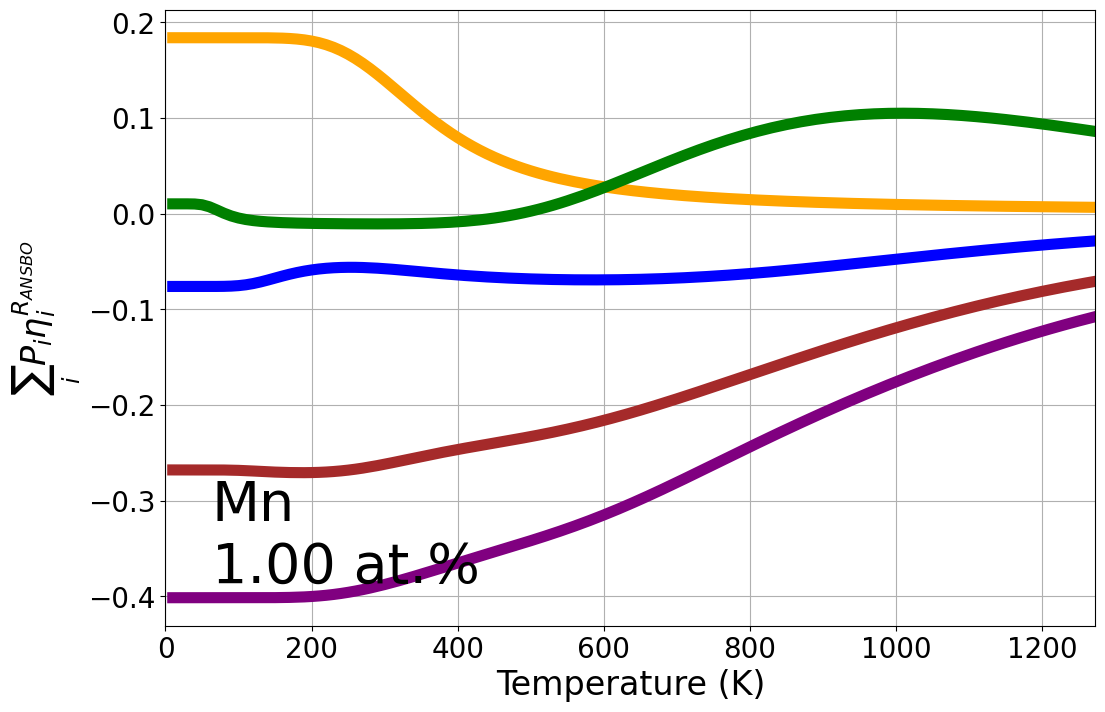

In [20]:
from FeGB_PtableSeg.plotters import plot_cohesion_vs_temp

start_temperature = 0
end_temperature = 1273
step = 10
temperature_range = np.arange(start_temperature, end_temperature, step)
alloy_conc = 0.01 # 1 at.%

fig_ansbo, ax_ansbo = plot_cohesion_vs_temp(df_spectra,
                                            element_to_plot="Mn",
                                            alloy_conc = alloy_conc,
                                            temp_range = (start_temperature, end_temperature),
                                            temp_step = 10,
                                            custom_colors=custom_colors,
                                            gb_latex_dict=gb_latex_dict,
                                            xlims=[start_temperature, end_temperature],
                                            cohesion_type="ANSBO")

/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:828: RuntimeWarning: divide by zero encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:829: RuntimeWarning: divide by zero encountered in divide
  (1 - c_bulk + c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature))))
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:828: RuntimeWarning: invalid value encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),


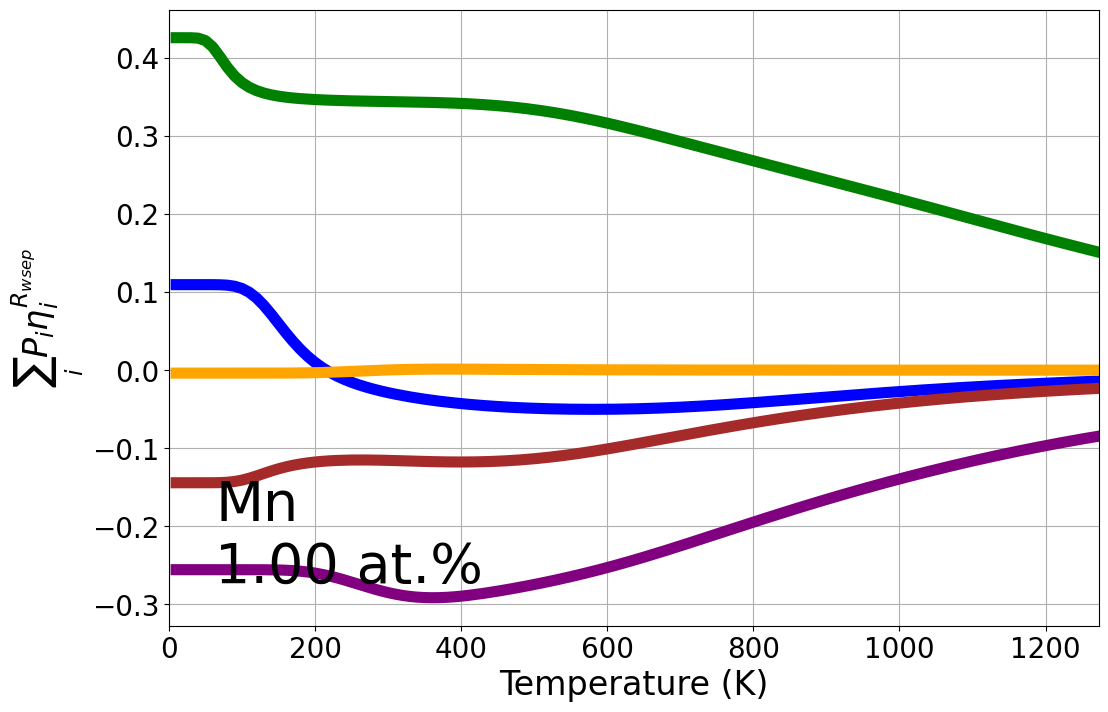

In [21]:
fig_wsep, ax_wsep = plot_cohesion_vs_temp(df_spectra,
                                            element_to_plot="Mn",
                                            alloy_conc = alloy_conc,
                                            temp_range = (start_temperature, end_temperature),
                                            temp_step = 10,
                                            custom_colors=custom_colors,
                                            gb_latex_dict=gb_latex_dict,
                                            xlims=[start_temperature, end_temperature],
                                            cohesion_type="wsep")

## Figure 10

In [22]:
# from FeGB_PtableSeg.plotters import plot_prop_vs_prop_with_2d_histograms

# fig, ax1 = plot_prop_vs_prop_with_2d_histograms(df[df["E_seg"] < 0.5],
#               x_prop="E_seg",
#               y_prop="R_Wsep_RGS",
#               figsize=(12, 12),
#               x_label = r"E$_{\rm{seg}}$ (eV)",
#               x_label_fontsize=30,
#               xtick_fontsize=30,
#               y_label = r"R(W$_{\rm{sep}}^{\rm{RGS}}$)",
#               y_label_fontsize=30,
#               ytick_fontsize=30,
#               legend_posn=(-0.01, 0.62),
#               ylims = (0.00, 1.4))
# _ = ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
# _ = ax1.axvline(0, linewidth=2, linestyle="-", c="k")

# fig, ax1 = plot_prop_vs_prop_with_2d_histograms(df[df["E_seg"] < 0.5],
#               x_prop="E_seg",
#               y_prop="R_DDEC6_ANSBO",
#               figsize=(12, 12),
#               x_label = r"E$_{\rm{seg}}$ (eV)",
#               x_label_fontsize=30,
#               xtick_fontsize=30,
#               y_label = r"R$_{\rm{ANSBO}}$",
#               y_label_fontsize=30,
#               ytick_fontsize=30,
#               legend_posn=(-0.01, 0.62),
#               ylims = (0.00, 1.4))
# _ = ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
# _ = ax1.axvline(0, linewidth=2, linestyle="-", c="k")


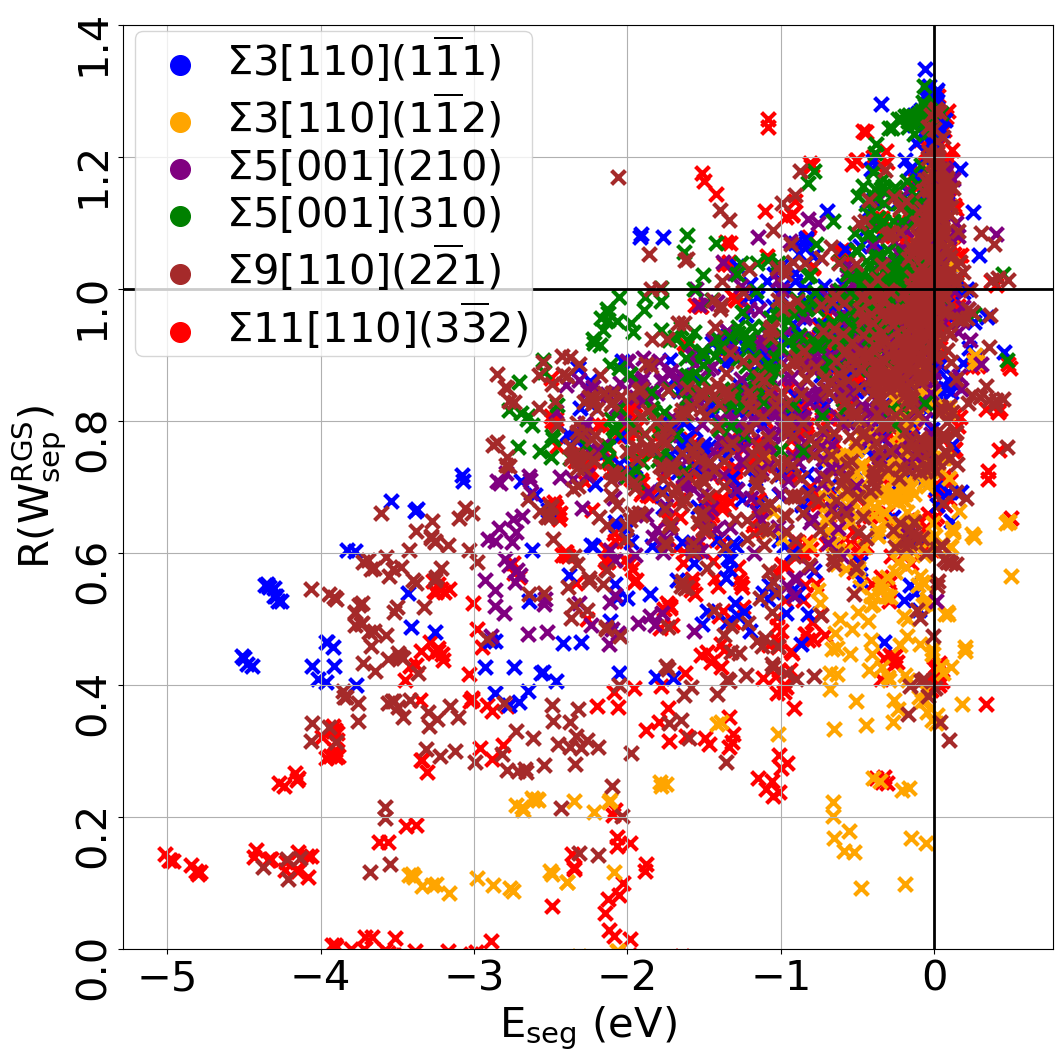

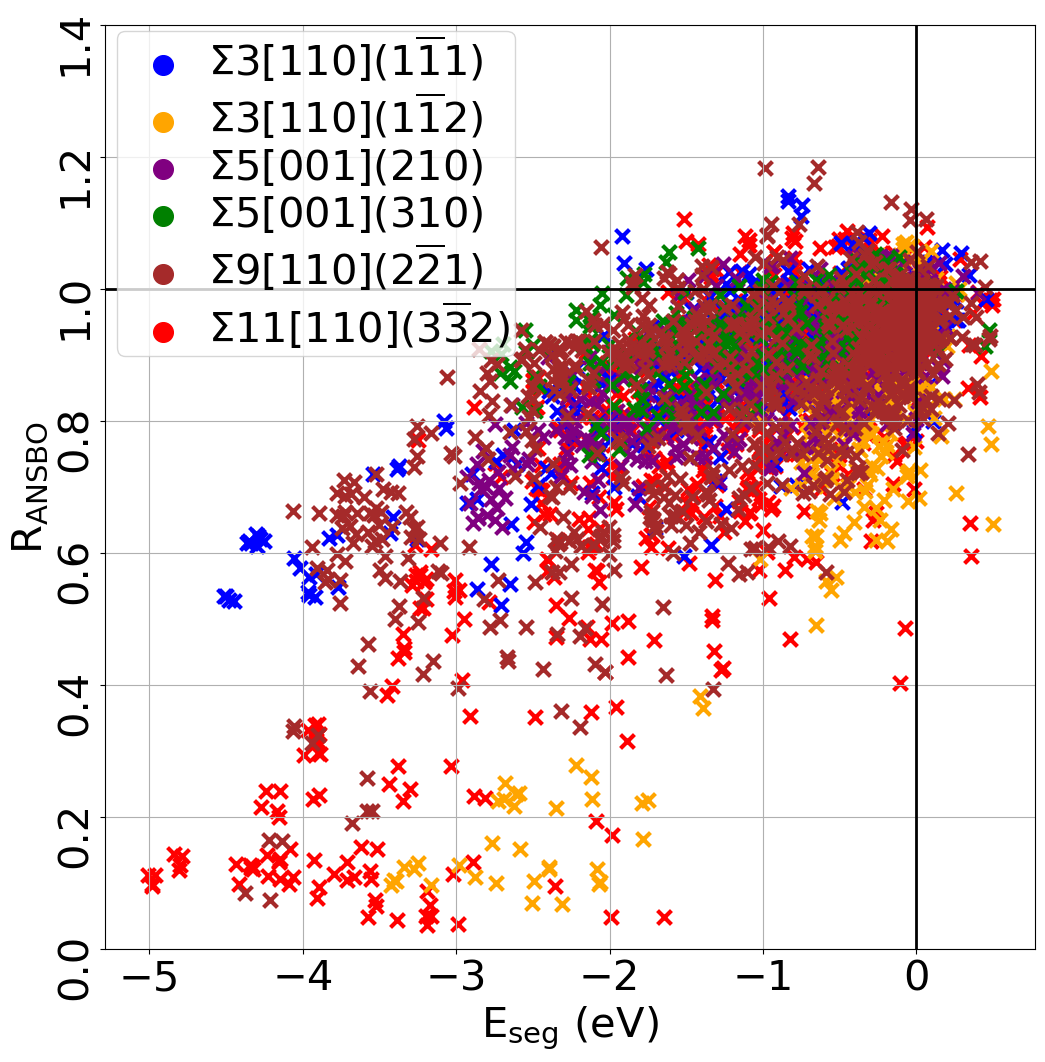

In [23]:
from FeGB_PtableSeg.plotters import plot_prop_vs_prop

fig, ax1 = plot_prop_vs_prop(df[df["E_seg"] < 0.5],
              x_prop="E_seg",
              y_prop="R_Wsep_RGS",
              figsize=(12, 12),
              x_label = r"E$_{\rm{seg}}$ (eV)",
              x_label_fontsize=30,
              xtick_fontsize=30,
              y_label = r"R(W$_{\rm{sep}}^{\rm{RGS}}$)",
              y_label_fontsize=30,
              ytick_fontsize=30,
              legend_posn=(-0.01, 0.62),
              ylims = (0.00, 1.4))
_ = ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
_ = ax1.axvline(0, linewidth=2, linestyle="-", c="k")

fig, ax1 = plot_prop_vs_prop(df[df["E_seg"] < 0.5],
              x_prop="E_seg",
              y_prop="R_DDEC6_ANSBO",
              figsize=(12, 12),
              x_label = r"E$_{\rm{seg}}$ (eV)",
              x_label_fontsize=30,
              xtick_fontsize=30,
              y_label = r"R$_{\rm{ANSBO}}$",
              y_label_fontsize=30,
              ytick_fontsize=30,
              legend_posn=(-0.01, 0.62),
              ylims = (0.00, 1.4))
_ = ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
_ = ax1.axvline(0, linewidth=2, linestyle="-", c="k")


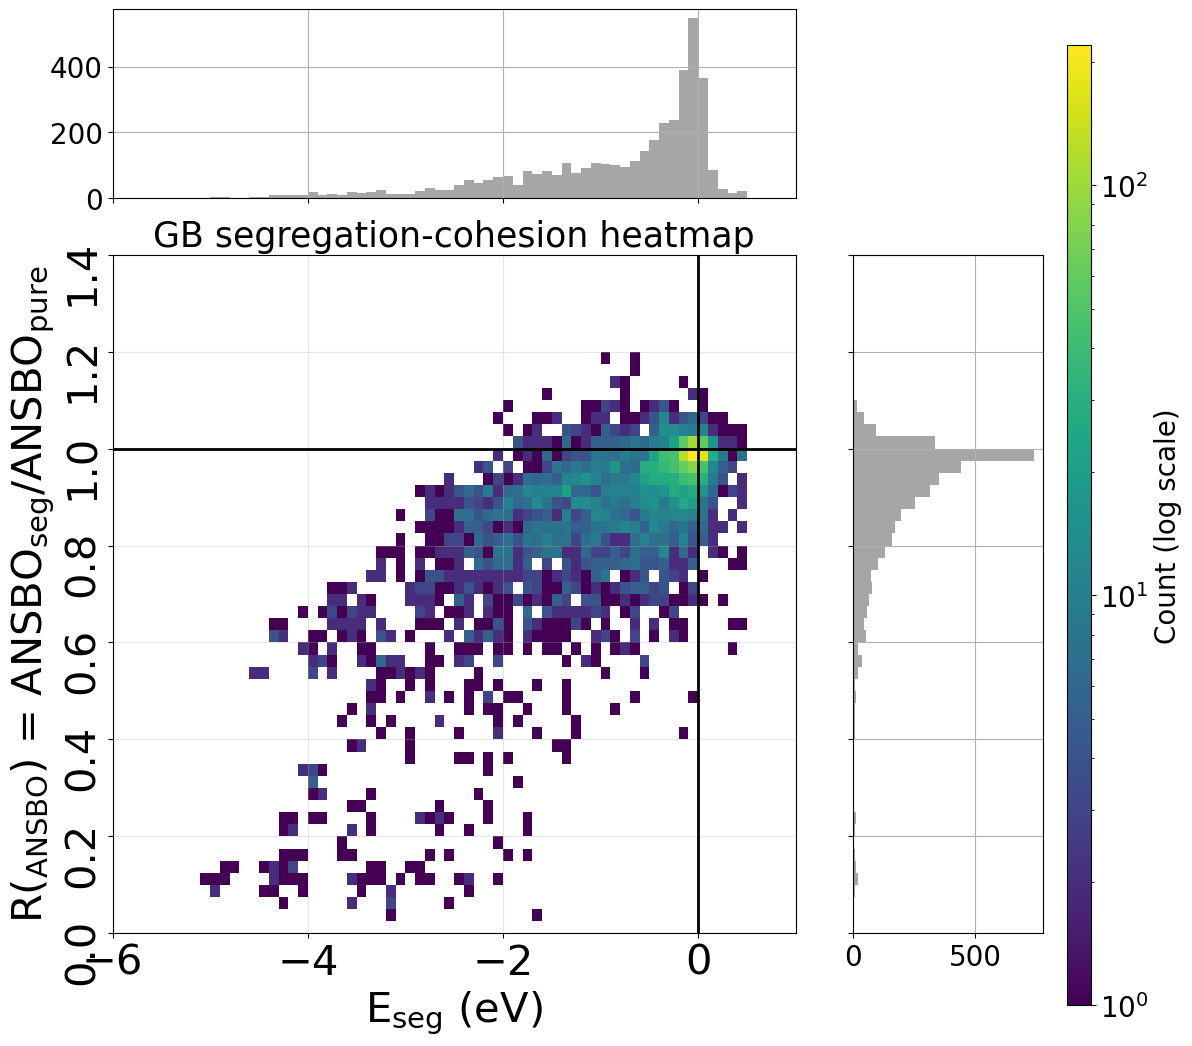

In [43]:
from FeGB_PtableSeg.plotters import plot_prop_vs_prop_with_2d_histograms

plot_df = df[df["E_seg"] < 0.5]

fig, ax1 = plot_prop_vs_prop_with_2d_histograms(
    x_values=plot_df.E_seg.values,
    y_values=plot_df.R_DDEC6_ANSBO.values,
    figsize=(12, 12),
    x_label=r"E$_{\rm{seg}}$ (eV)",
    x_label_fontsize=30,
    xtick_fontsize=30,
    y_label=r"R($_{\rm{ANSBO}}$) = ANSBO$_{\rm{seg}}$/ANSBO$_{\rm{pure}}$",
    y_label_fontsize=30,
    ytick_fontsize=30,
    hist_tick_fontsize=20,
    legend_posn=(-0.01, 0.62),
    colorbar_tick_fontsize=20,  # Added colorbar tick font size
    colorbar_size=[0.92, 0.05, 0.02, 0.8],  # Colorbar size [left, bottom, width, height]
    ylims=(0.00, 1.4),
    x_bin_width=0.1,  # Bin width for the histograms
    y_bin_width=0.025)

# Add vertical and horizontal lines
ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
ax1.axvline(0, linewidth=2, linestyle="-", c="k")

# Set the title to indicate the current GB group
ax1.set_title(f"GB segregation-cohesion heatmap", fontsize=25)
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/R_ANSBO_vs_Eseg_AllSites_Heatmap.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)


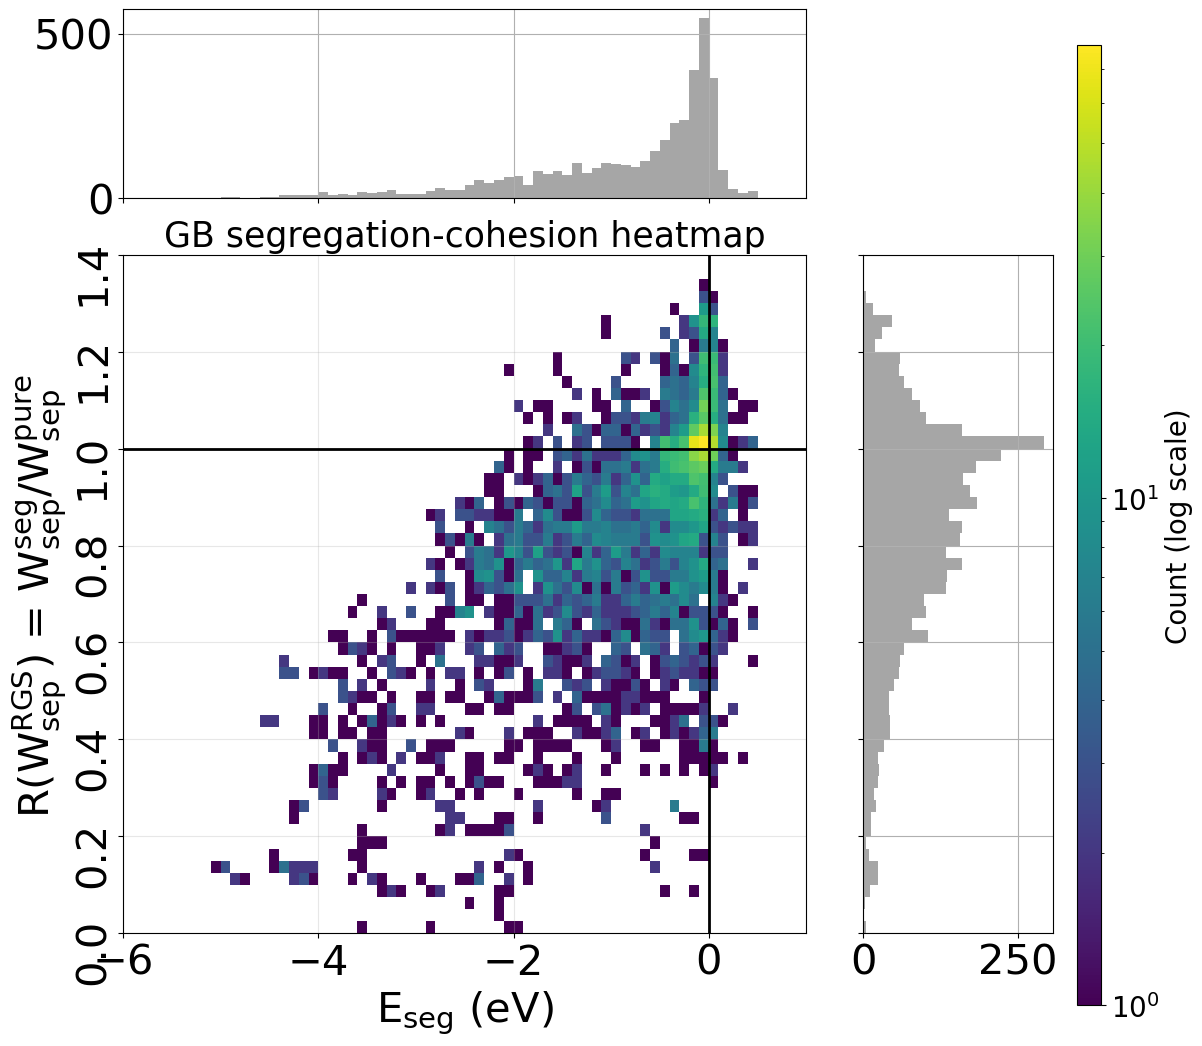

In [45]:
fig, ax1 = plot_prop_vs_prop_with_2d_histograms(
    x_values=plot_df.E_seg.values,
    y_values=plot_df.R_Wsep_RGS.values,
    figsize=(12, 12),
    x_label=r"E$_{\rm{seg}}$ (eV)",
    x_label_fontsize=30,
    xtick_fontsize=30,
    y_label=r"R(W$_{\rm{sep}}^{\rm{RGS}}$) = W$_{\rm{sep}}^{\rm{seg}}$/W$_{\rm{sep}}^{\rm{pure}}$ ",
    y_label_fontsize=30,
    ytick_fontsize=30,
    hist_tick_fontsize=30,
    legend_posn=(-0.01, 0.62),
    colorbar_tick_fontsize=20,  # Added colorbar tick font size
    colorbar_size=[0.92, 0.05, 0.02, 0.8],  # Colorbar size [left, bottom, width, height]
    ylims=(0.00, 1.4),
    x_bin_width=0.1,  # Bin width for the histograms
    y_bin_width=0.025)
# Add vertical and horizontal lines
ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
ax1.axvline(0, linewidth=2, linestyle="-", c="k")

# Set the title to indicate the current GB group
ax1.set_title(f"GB segregation-cohesion heatmap", fontsize=25)
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/R_Wsep_vs_Eseg_AllSites_Heatmap.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)


## Figure 11

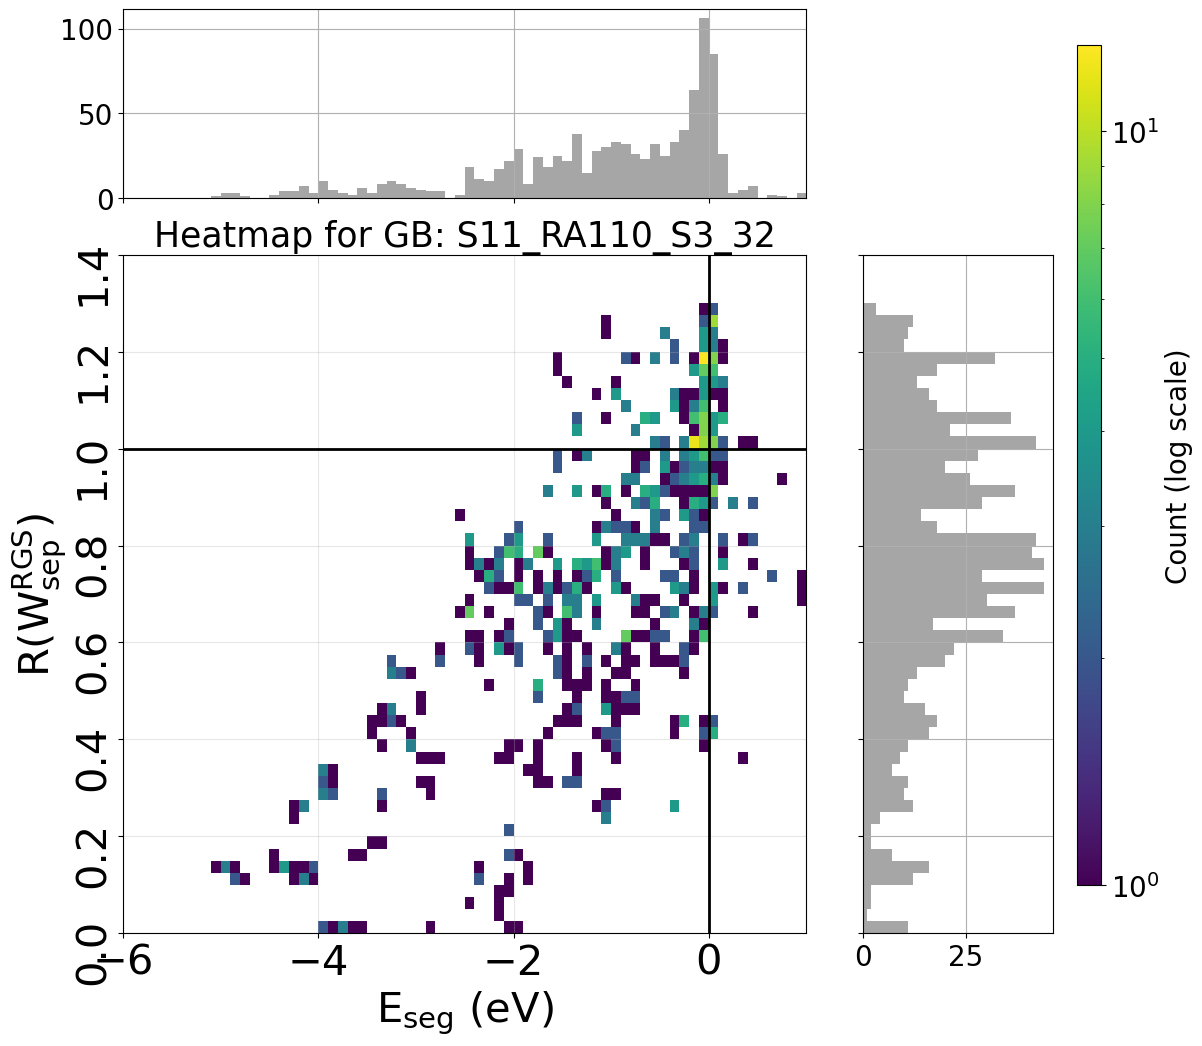

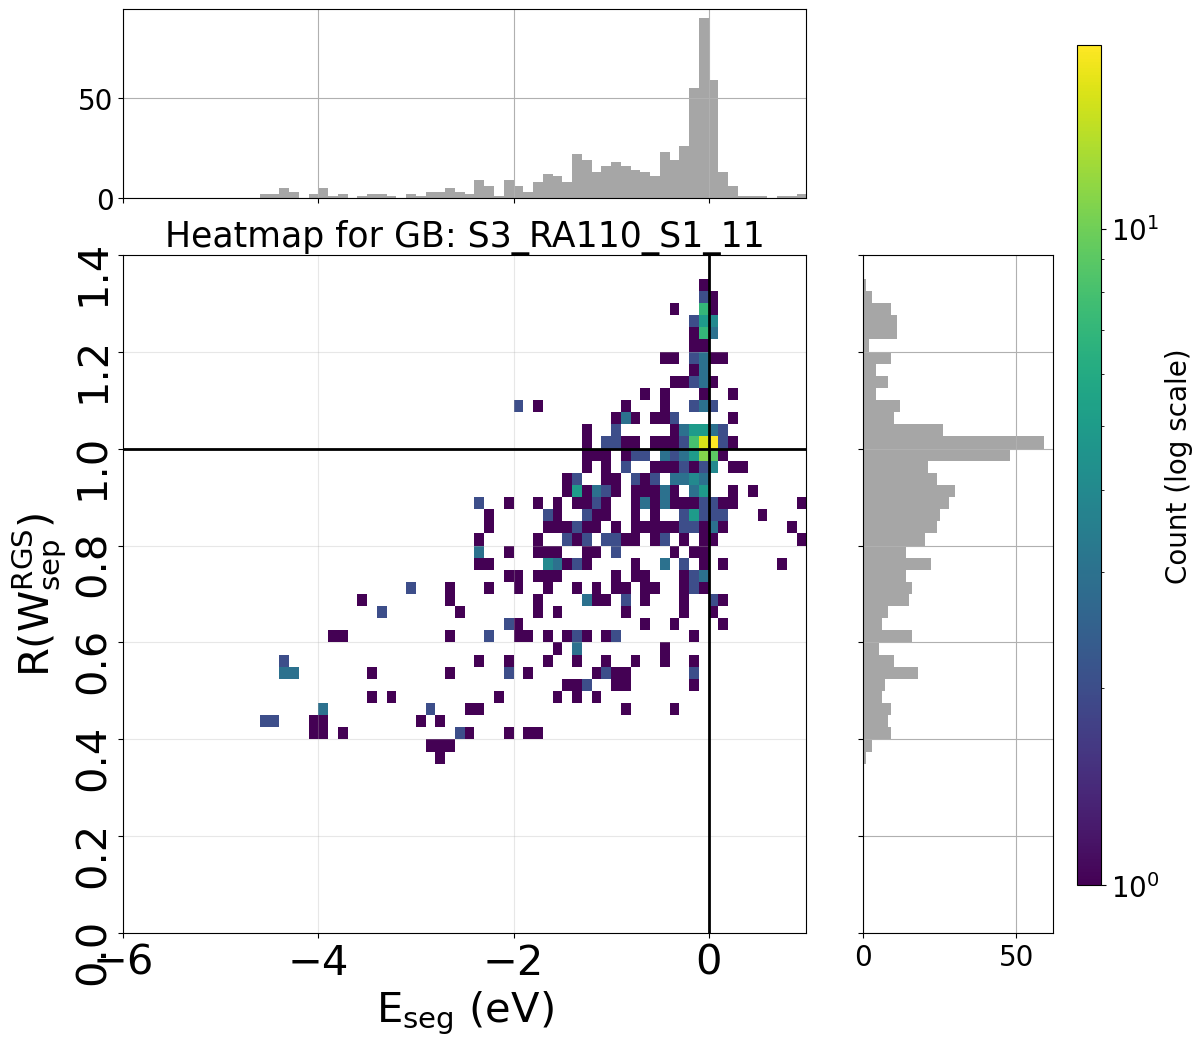

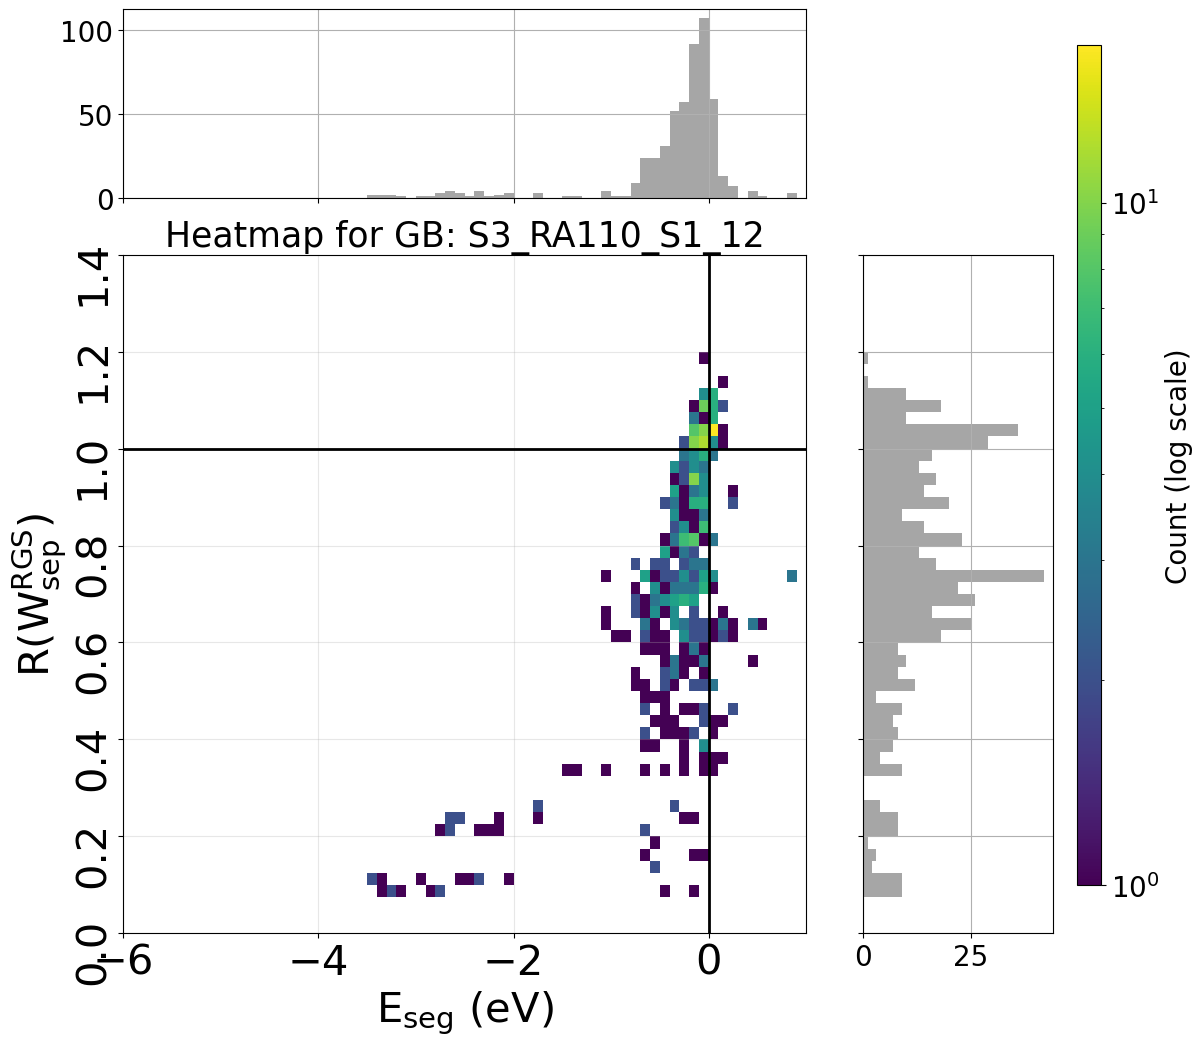

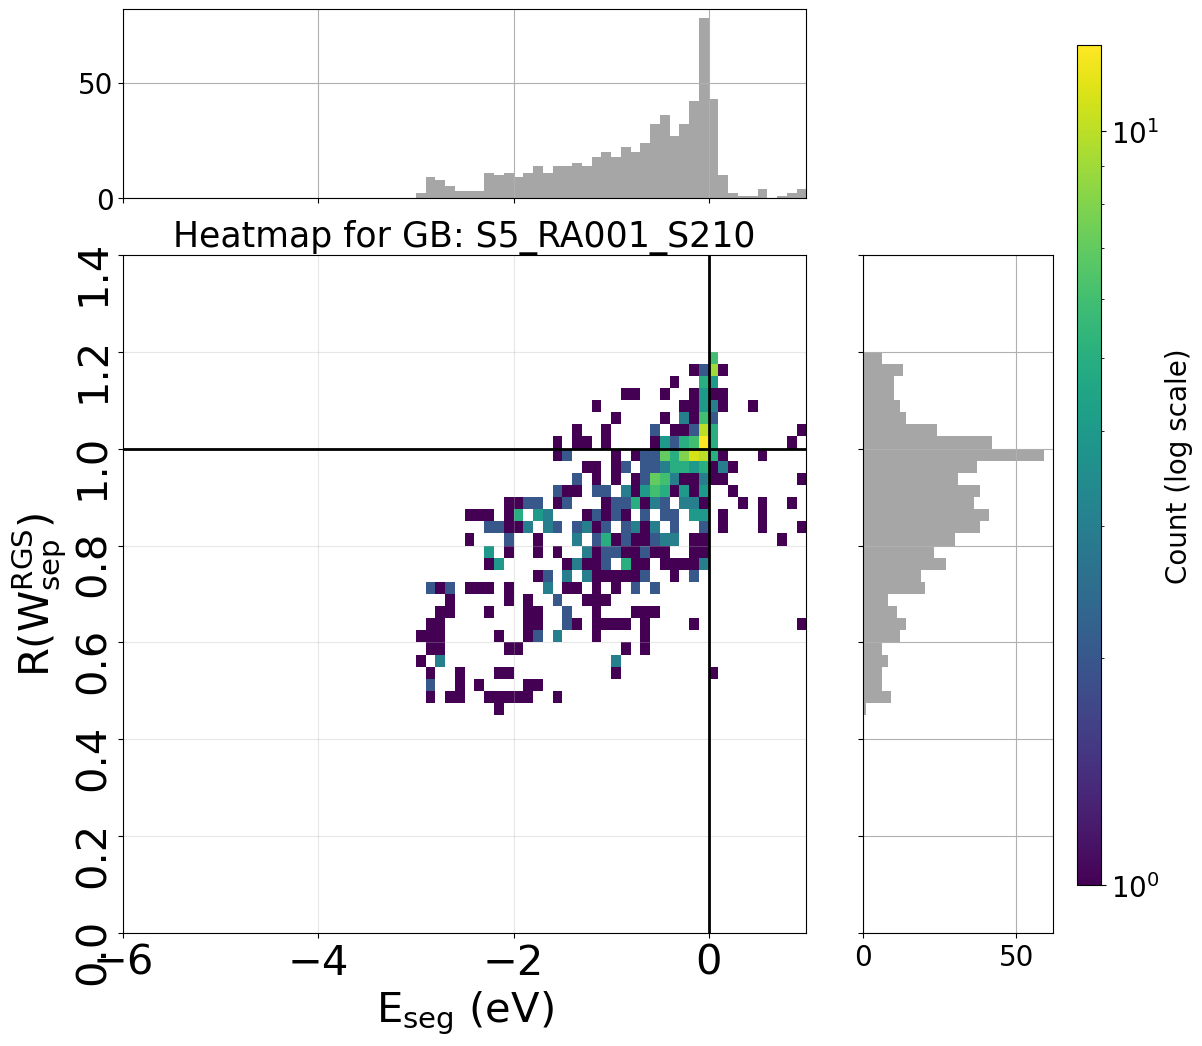

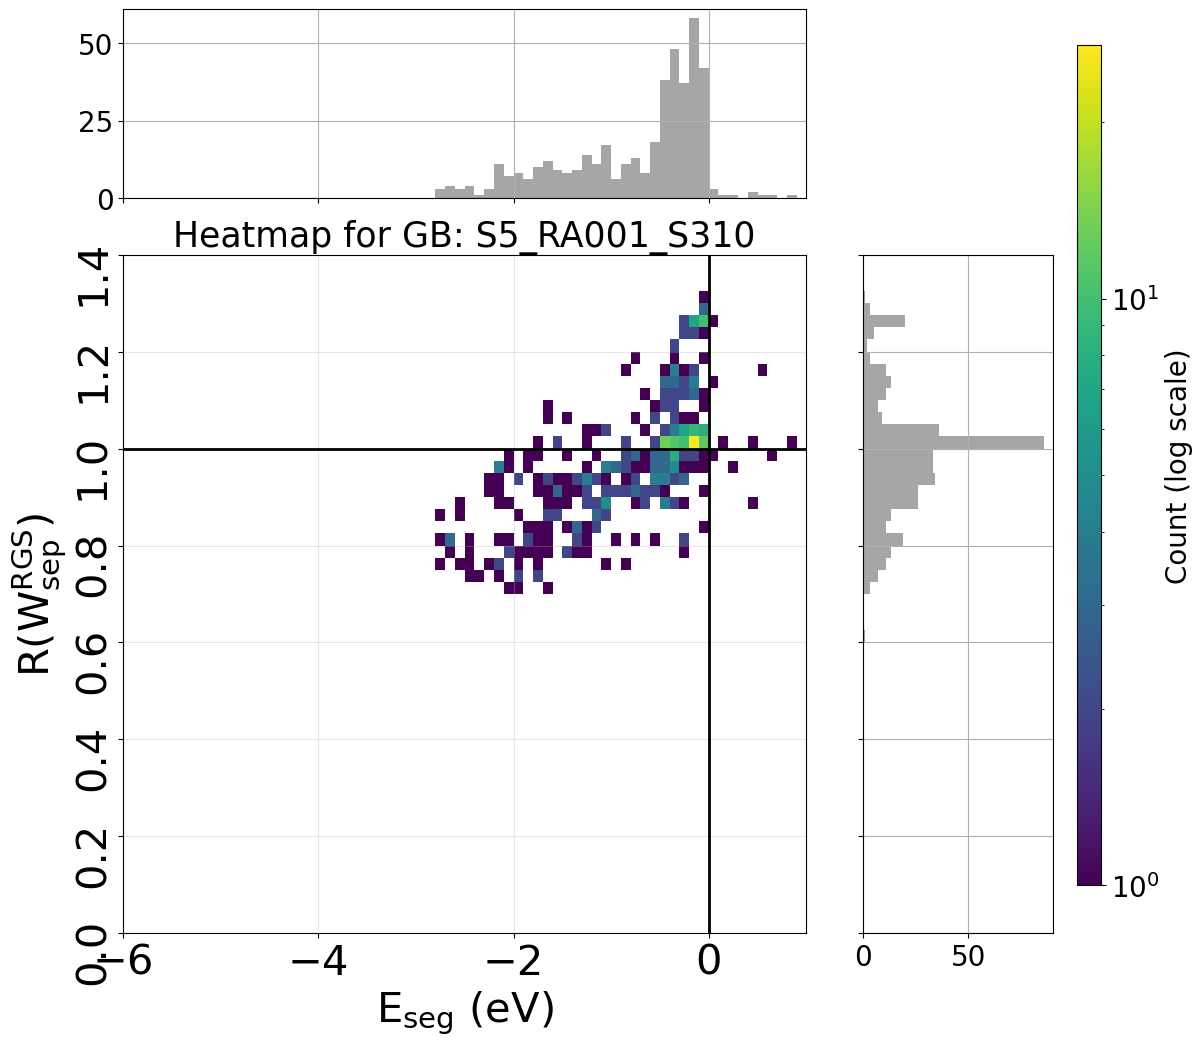

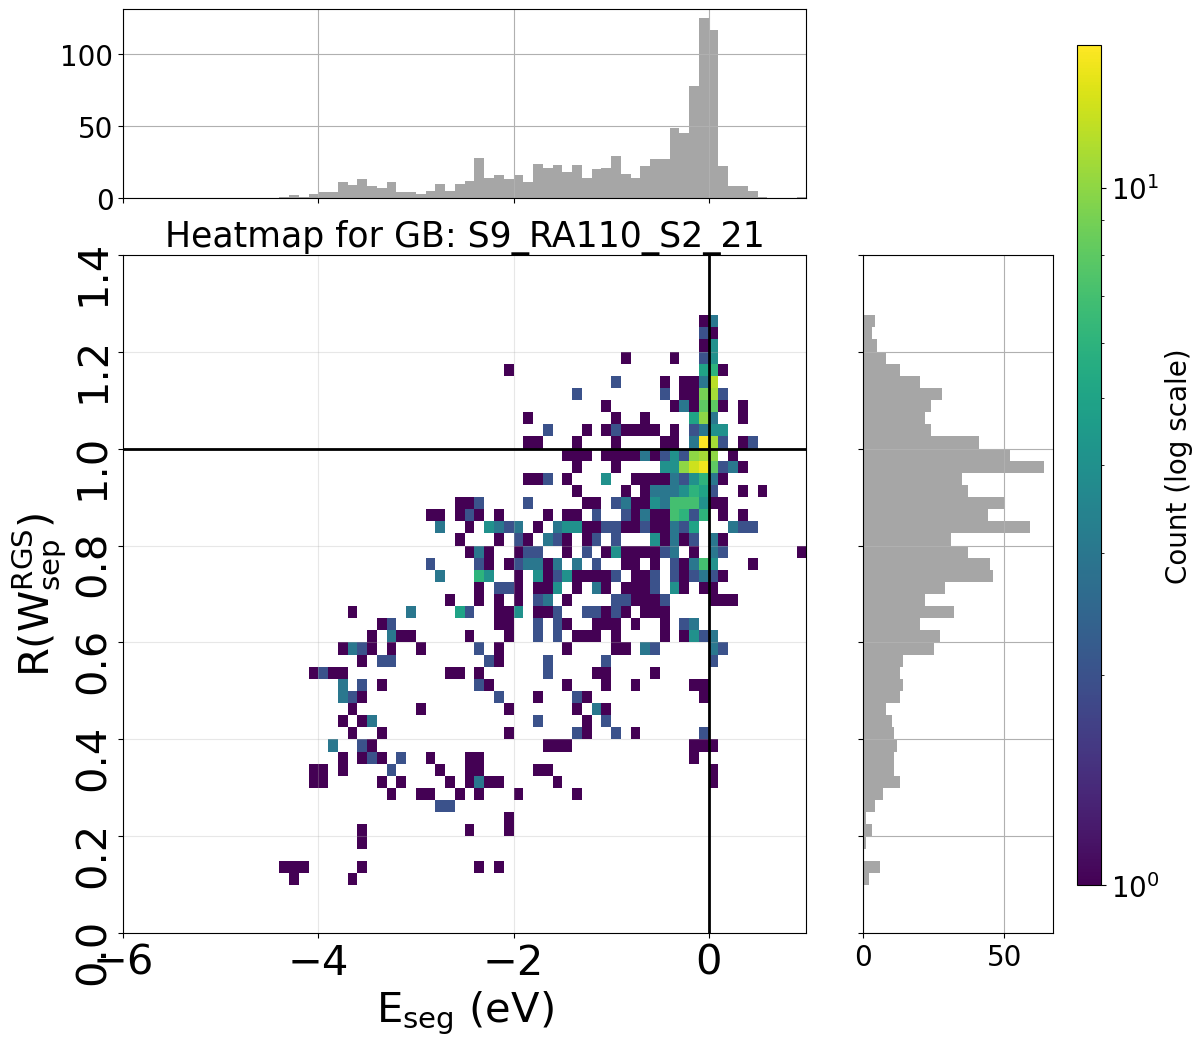

In [26]:
# Calculate the range for uniform binning and floor to align with zero
x_min, x_max = df["E_seg"].min(), df[df["E_seg"] < 0.5]["E_seg"].max()
y_min, y_max = df["R_DDEC6_ANSBO"].min(), df["R_DDEC6_ANSBO"].max()

# Floor the minimum values to the nearest lower integer and ceil the maximum values to ensure alignment
x_min = np.floor(x_min)
x_max = np.ceil(x_max)
y_min = np.floor(y_min)
y_max = np.ceil(y_max)

# Ensure that zero is aligned as a bin edge
x_min = min(x_min, 0)
y_min = min(y_min, 0)
bins=0.2
range_xy = [(x_min, x_max), (y_min, y_max)]

for gb in df.GB.unique():
    # Filter the DataFrame for the current GB group
    df_gb = df[df["GB"] == gb]

    # Plot the heatmap for the current GB group
    fig, ax1 = plot_prop_vs_prop_with_2d_histograms(
        x_values=df_gb.E_seg.values,
        y_values=df_gb.R_Wsep_RGS.values,
        figsize=(12, 12),
        x_label=r"E$_{\rm{seg}}$ (eV)",
        x_label_fontsize=30,
        xtick_fontsize=30,
        y_label=r"R(W$_{\rm{sep}}^{\rm{RGS}}$)",
        y_label_fontsize=30,
        ytick_fontsize=30,
        legend_posn=(-0.01, 0.62),
        ylims=(0.00, 1.4),
        x_bin_width=0.1,  # Bin width for the histograms
        y_bin_width=0.025,
        range_xy=range_xy  # Pass the uniform range
    )

    # Add vertical and horizontal lines
    ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
    ax1.axvline(0, linewidth=2, linestyle="-", c="k")

    # Set the title to indicate the current GB group
    ax1.set_title(f"Heatmap for GB: {gb}", fontsize=25)

    # Show the plot
    plt.show()

/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/SegregationEngineering_min_E_seg_vs_R_ANSBO_S5_RA001_S210.png


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


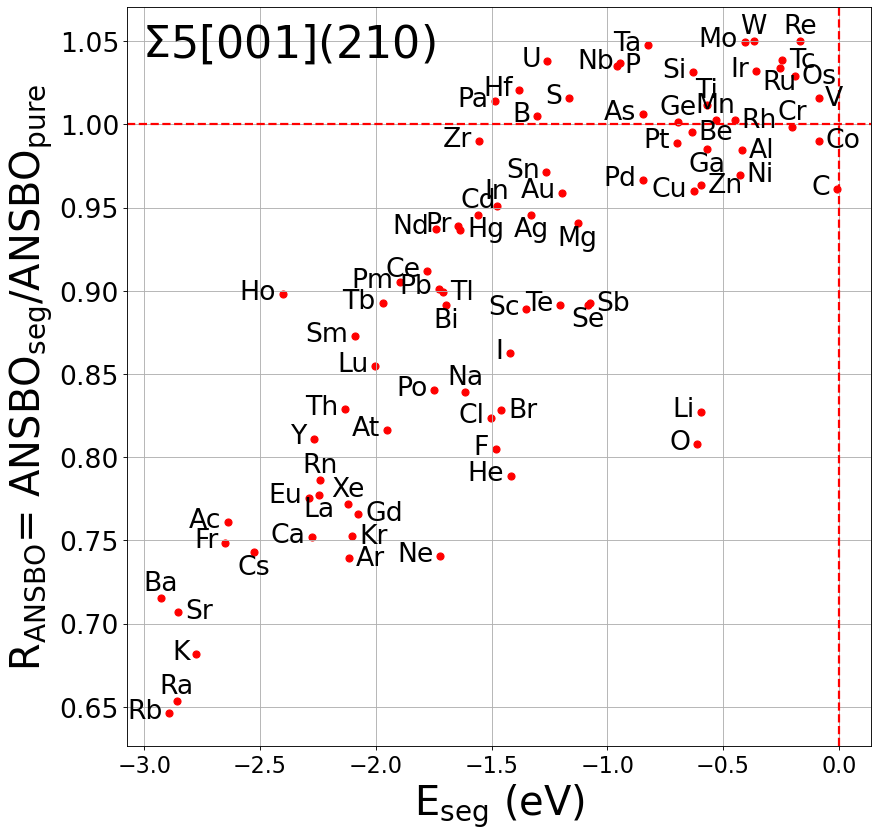

In [27]:
from FeGB_PtableSeg.plotters import plot_prop_vs_prop_GB
x_prop = "E_seg"
y_prop = "R_DDEC6_ANSBO"
gb_to_plot = 'S5_RA001_S210'
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/SegregationEngineering_min_{x_prop}_vs_R_ANSBO_{gb_to_plot}.png"
print(write_path)
# Try any particular GB! Find the appropriate strings from gb_latex_dict.keys()
# ['S5_RA001_S310', 'S5_RA001_S210', 'S11_RA110_S3_32', 'S3_RA110_S1_12', 'S3_RA110_S1_11', 'S9_RA110_S2_21']
fig, ax = plot_prop_vs_prop_GB(df,
                            gb_to_plot=gb_to_plot,
                            y_prop=y_prop,
                            x_prop=x_prop,
                            ylabel=r"R$_{\rm{ANSBO}}$= ANSBO$_{\rm{seg}}$/ANSBO$_{\rm{pure}}$", 
                            xlabel=r"E$_{\rm{seg}}$ (eV)",
                            custom_colors=custom_colors,
                            gb_latex_dict=gb_latex_dict,
                            label_left=[],
                            label_right=["Tl", "P", "Sb", "Br", "Sr", "Gd", "Hg", "Zn", "Ni", "Be", "Rh", "Tc", "V", "Os", "Al","Co", "Kr", "Ar"],
                            label_bottom=["La", "Ru", "Se", "Mg", "Ag", "Ga", "Cs", "Bi"],
                            label_top=["Na", "Ra", "Xe", "Ti", "Mn", "Ge", "W", "Re", "In", "Cd", "Cr", "Ba", "Rn"],
                            horizontal_padding=0.002,
                            vertical_padding=0.001)#, fig_dir='path/to/save/figures')
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


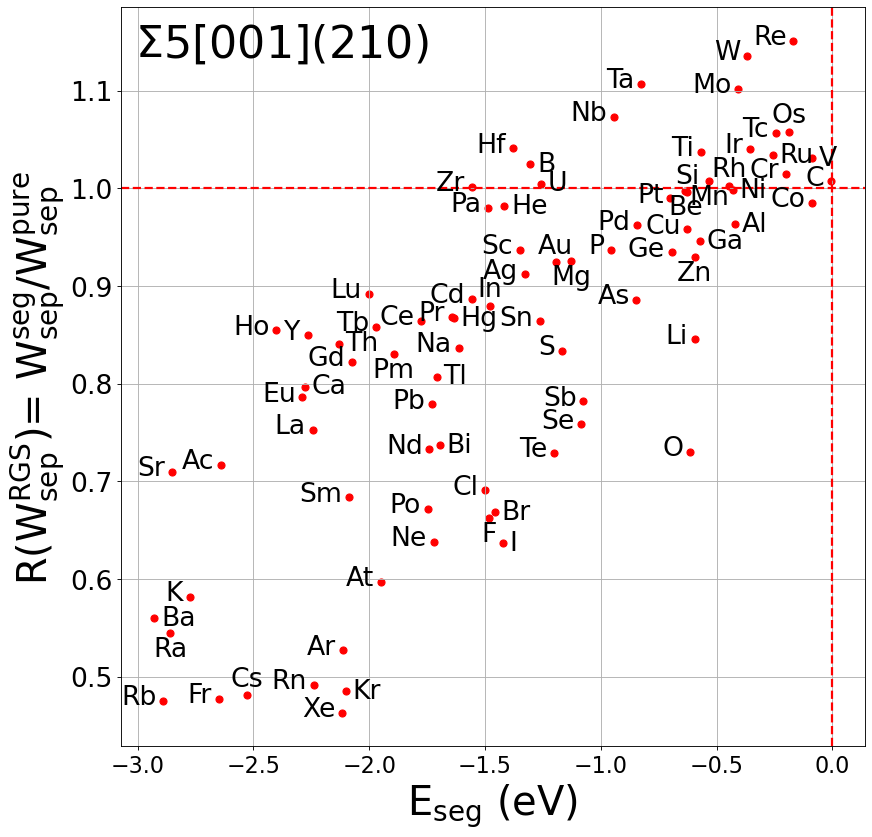

In [28]:
fig, ax = plot_prop_vs_prop_GB(df,
                            gb_to_plot='S5_RA001_S210',
                            y_prop="R_Wsep_RGS",
                            x_prop="E_seg",
                            ylabel=r"R(W$_{\rm{sep}}^{\rm{RGS}}$)= W$_{\rm{sep}}^{\rm{seg}}$/W$_{\rm{sep}}^{\rm{pure}}$", 
                            xlabel=r"E$_{\rm{seg}}$ (eV)",
                            custom_colors=custom_colors,
                            gb_latex_dict=gb_latex_dict,
                            label_left=[],
                            label_right=["Ga", "Al", "U", "B", "He", "Ni", "V", "Ru", "Bi", "Ca", "Kr", "I", "Hg", "Tl", "Th", "Ba", "Br"],
                            label_bottom=["Mn", "Be", "Mg", "Ra", "F", "Pm", "Zn"],
                            label_top=["Os", "Rh", "Si", "Au", "Cs", "In"],
                            horizontal_padding=0.002,
                            vertical_padding=0.001)
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/SegregationEngineering_min_{x_prop}_vs_R_wsep_{gb_to_plot}.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 12a

In [29]:
df["R_ordered_ANSBO_lst"] = [np.array(row.ANSBO_Wsep_RGS_corr_vals)/row.pure_DDEC6_min_ANSBO for _, row in df.iterrows()]
df["R_Wsep_RGS_lst_minidx"] = df.R_Wsep_RGS_lst.apply(lambda x: np.argmin(x))
df["R_DDEC6_ANSBO_minidx"] = df.R_DDEC6_ANSBO_lst.apply(lambda x: np.argmin(x))

R_Wsep_basedonmin_ANSBO = []
for _, row in df.iterrows():
    try:
        a = row.R_Wsep_RGS_lst[row.R_DDEC6_ANSBO_minidx]
    except TypeError as e:
        a = np.nan
    R_Wsep_basedonmin_ANSBO.append(a)

df["R_Wsep_RGS_wrt_min_ANSBO"] = R_Wsep_basedonmin_ANSBO

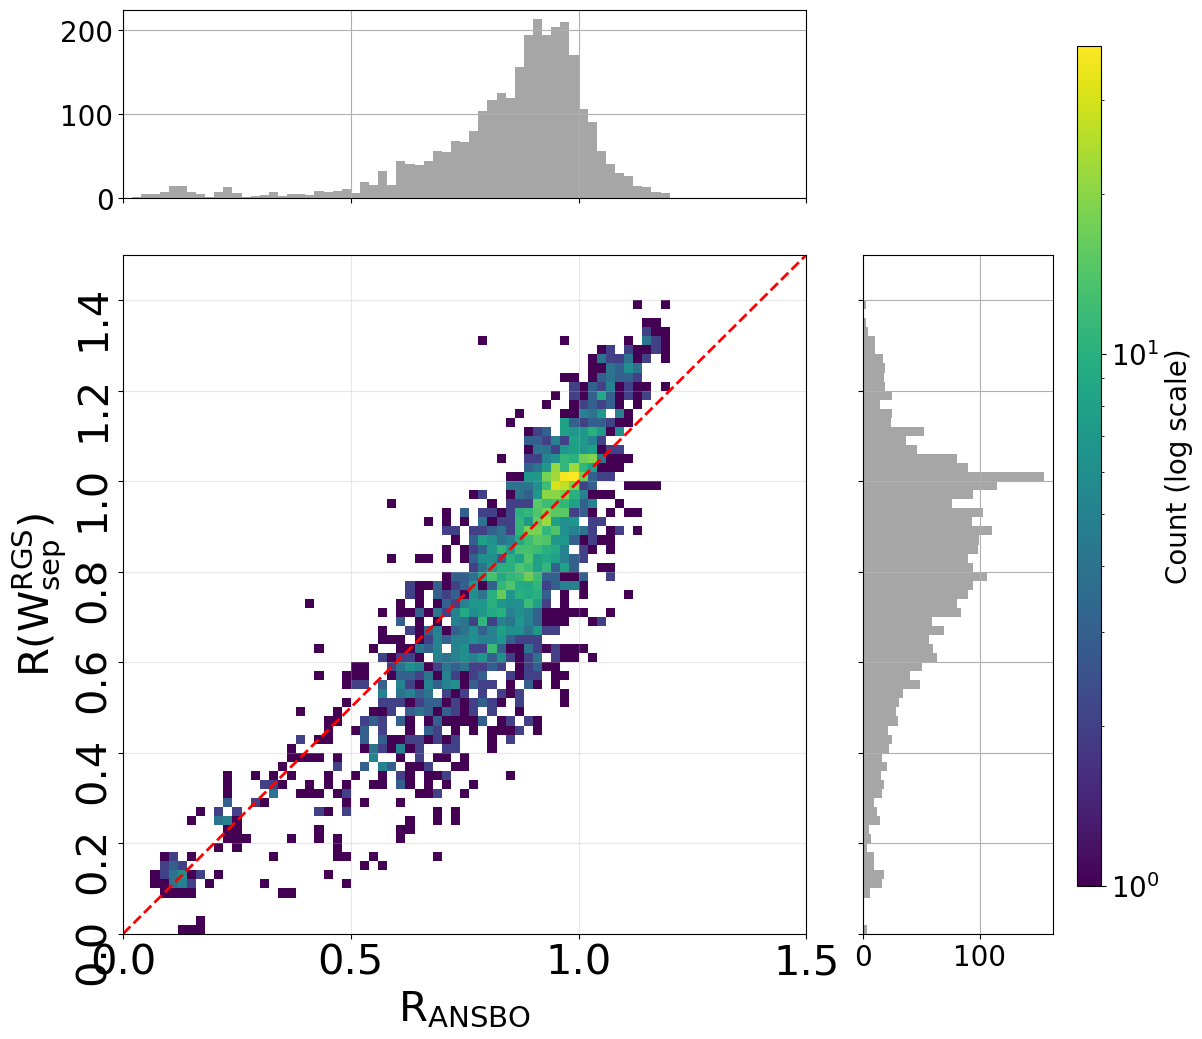

In [42]:
R_min3_ANSBO_vals = []
R_Wsep_basedonmin3_ANSBO = []
rows_to_drop = []  # List to keep track of rows that do not meet the criteria

for index, row in df.iterrows():
    # Check if the columns are lists/arrays and have enough values (at least 3)
    if isinstance(row.R_DDEC6_ANSBO_lst, (list, np.ndarray)) and \
       isinstance(row.R_Wsep_RGS_lst, (list, np.ndarray)) and \
       len(row.R_DDEC6_ANSBO_lst) >= 3:
        
        # Get the indices of the three smallest values in R_DDEC6_ANSBO_lst
        min3_indices = np.argsort(row.R_DDEC6_ANSBO_lst)[:1]

        # Use those indices to get the corresponding ANSBO values and R_Wsep_RGS values
        min3_ANSBO_vals = [row.R_DDEC6_ANSBO_lst[idx] for idx in min3_indices]
        min3_Wsep_vals = [row.R_Wsep_RGS_lst[idx] for idx in min3_indices]

        R_min3_ANSBO_vals.append(min3_ANSBO_vals)
        R_Wsep_basedonmin3_ANSBO.append(min3_Wsep_vals)
    else:
        # Mark the index of the row to be dropped
        rows_to_drop.append(index)

# Drop rows that do not meet the criteria
df = df.drop(index=rows_to_drop)
# Add the new columns to the filtered DataFrame
df["R_min3_ANSBO_vals"] = R_min3_ANSBO_vals
df["R_Wsep_RGS_wrt_min3_ANSBO"] = R_Wsep_basedonmin3_ANSBO
plot_df = df[df["E_seg"] < -0.1]

# Plotting the scatter plot with histograms (as done earlier)
# Plotting the scatter plot with histograms with equal axes ticks and limits at 1.3
x_vals = [val for sublist in plot_df["R_min3_ANSBO_vals"] for val in sublist]
y_vals = [val for sublist in plot_df["R_Wsep_RGS_wrt_min3_ANSBO"] for val in sublist]
limit = 1.5
range_xy=[(0, limit), (0, limit)]
fig, ax = plot_prop_vs_prop_with_2d_histograms(
        x_values=x_vals,
        y_values=y_vals,
        figsize=(12, 12),
        x_label=r"R$_{\rm{ANSBO}}$",
        x_label_fontsize=30,
        xtick_fontsize=30,
        y_label=r"R(W$_{\rm{sep}}^{\rm{RGS}}$)",
        y_label_fontsize=30,
        ytick_fontsize=30,
        legend_posn=(-0.01, 0.62),
        ylims=(0.00, limit),
        x_bin_width=0.02,  # Bin width for the histograms
        y_bin_width=0.02,
        range_xy=range_xy  # Pass the uniform range
    )
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

# Zip x_vals and y_vals, filter out any pairs containing NaN or Inf, and create new clean arrays
valid_pairs = [(x, y) for x, y in zip(x_vals, y_vals) if not (np.isnan(x) or np.isnan(y) or np.isinf(x) or np.isinf(y))]

# # Unzip the filtered pairs into separate arrays
# x_vals_clean, y_vals_clean = zip(*valid_pairs)

# # Convert to NumPy arrays
# x_vals_clean = np.array(x_vals_clean)
# y_vals_clean = np.array(y_vals_clean)

# # Calculate R^2 (coefficient of determination) using numpy
# ss_total = np.sum((x_vals_clean - np.mean(x_vals_clean))**2)
# ss_residual = np.sum((x_vals_clean - y_vals_clean)**2)
# r2 = 1 - (ss_residual / ss_total)

# # Calculate RMSE (Root Mean Squared Error) using numpy
# rmse = np.sqrt(np.mean((x_vals_clean - y_vals_clean)**2))

# textstr = f'$R^2$: {r2:.3f}\nRMSE: {rmse:.3f}'

# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,

# verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

ax.plot([0, limit], [0, limit], color='red', linestyle='--', linewidth=2)

write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/R_Wsep_vs_R_ANSBO_heatmap.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)

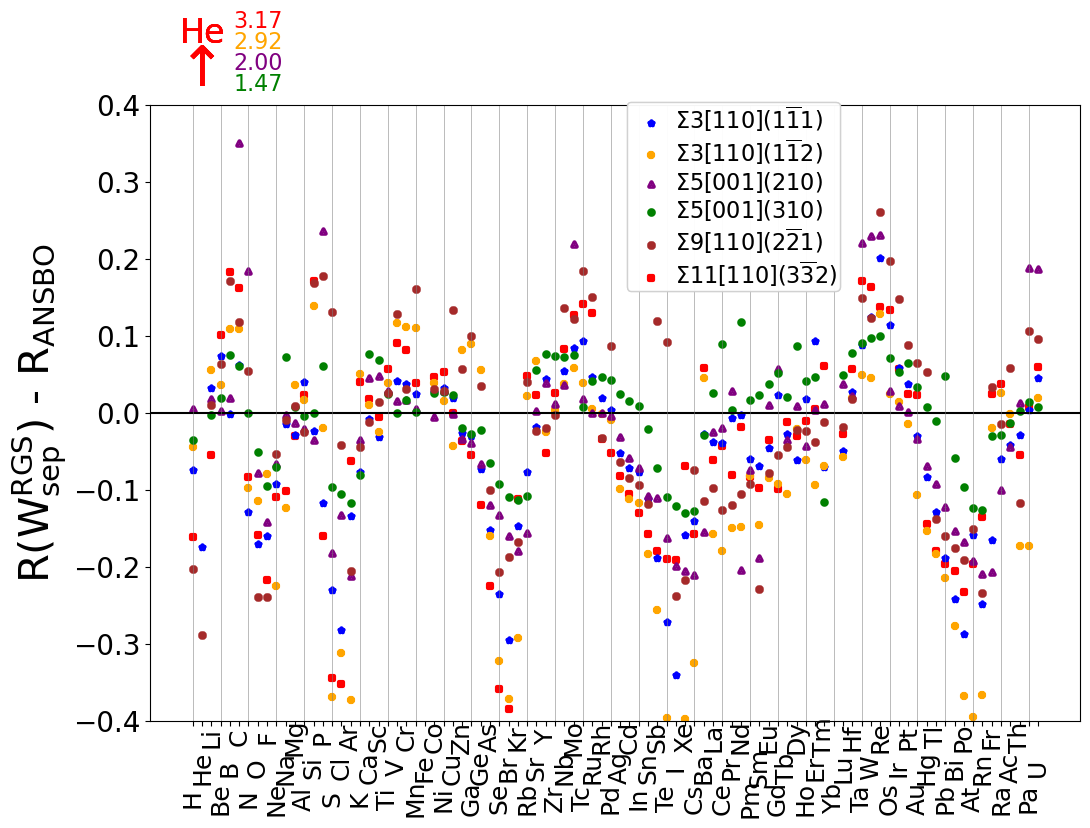

In [31]:
figsize = (12, 8)
ylabel = r"R(W$_{\rm{sep}}^{\rm{RGS}}$) - R$_{\rm{ANSBO}}$"
ylabel_fontsize = 30
xtick_labels = bulk_df.element.values
xtick_posns = bulk_df.Z.values
xtick_fontsize = 18
ytick_fontsize = 20
shift_xticks = True
xtick_yshift = 0
legend_fontsize = 16


def annotate_outliers(x, y, user_text, threshold=0.4, data=None):
    arrow_text = '↑' if y > threshold else '↓'
    arrow_direction = 'bottom' if y > threshold else 'top'
    arrow_color = 'red' if y > threshold else 'green'
    arrow_xytext = (0, 5) if y > threshold else (0, -5)  # Offset for the arrow

    # Annotating the arrow
    ax.annotate(arrow_text, xy=(x, threshold if y > threshold else -threshold), 
                xytext=arrow_xytext, textcoords="offset points", ha='center', va=arrow_direction, 
                color=arrow_color, fontsize=40)

    # User text placement relative to the arrow
    user_text_xytext = (0, 40) if y > threshold else (0, -20)  # Adjust this offset as needed
    ax.annotate(user_text, xy=(x, threshold if y > threshold else -threshold), 
                xytext=user_text_xytext, textcoords="offset points", ha='center', 
                va='bottom' if y > threshold else 'top', color=arrow_color, fontsize=24)
    
min_Eseg_df = []
for gb, gb_df in df.dropna(subset="R_Wsep_RGS_lst").groupby("GB"):
    # First, find the row indices of the minimum "E_seg" within each "Element" group
    idx_min_E_seg_per_element = gb_df.groupby('element')['E_seg'].idxmin()
    # Use these indices to select the corresponding rows from the original DataFrame
    min_E_seg_GB_df = df.loc[idx_min_E_seg_per_element].reset_index(drop=True)
    min_Eseg_df.append(min_E_seg_GB_df)

min_Eseg_perGB_df = pd.concat(min_Eseg_df)


# Create a plot
fig, ax = plt.subplots(figsize=figsize)
gb_legends = []  # Initialize outside the loop to collect all legend entries
thresholds = [-0.4, 0.4]

# Looping over each unique "element"
for gb, gb_df in min_Eseg_perGB_df.groupby("GB"):
    x_values = gb_df['Z']
    # I am comparing the min ANSBO cleavage plane cohesion quant vs Wsep
    y_values = gb_df['R_Wsep_RGS_wrt_min_ANSBO'] - gb_df['R_DDEC6_ANSBO'] 
    line = ax.scatter(x_values, y_values, color=custom_colors[gb], marker=gb_marker_dict[gb], linewidth=3, s=10)
    for x, y in zip(x_values, y_values):
        if y > 0.7 or y < -0.7:
            annotate_outliers(x, y,user_text="He", data=y)
    gb_legends.append((line, gb_latex_dict[gb]))  # Append each legend entry
ax.axhline(0, color="k")  # Horizontal line at y=0
ax.set_ylim(thresholds[0], thresholds[1])  # Set y-axis limits to -0.7 to 0.7

# Set labels and axis properties
ax.set_ylabel(ylabel, fontsize=ylabel_fontsize)
if xtick_labels is not None and xtick_posns is not None:
    ax.set_xticks(xtick_posns)
    ax.set_xticklabels(xtick_labels, fontsize=xtick_fontsize, rotation=90, va='center')
ax.tick_params(axis='y', labelsize=ytick_fontsize)

# Adjust the position of x-tick labels if needed
if shift_xticks:
    shifts = [-0.11, -0.06, -0.01, 0.04, 0.09]  # Define y-shift values
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_y(shifts[:3][i % 3] + xtick_yshift)
        
gridline_positions = np.arange(1, 93, 3)
for pos in gridline_positions:
    ax.axvline(x=pos, linestyle='-', linewidth='0.5', color='grey', alpha=0.75)

# Adjust the order of legend entries if needed and create legend
gb_legends.append(gb_legends.pop(0))
gb_legend = ax.legend(*zip(*gb_legends), bbox_to_anchor=(0.5, 0.68), loc="lower left", fontsize=legend_fontsize, handletextpad=0.1, borderpad=0.1, labelspacing=0.15)
ax.add_artist(gb_legend)

outliers = {}

# Loop to collect outliers
for gb, gb_df in min_Eseg_perGB_df.groupby("GB"):
    x_values = gb_df['Z']
    y_values = gb_df['R_Wsep_RGS_wrt_min_ANSBO'] - gb_df['R_DDEC6_ANSBO']
    color = custom_colors[gb]  # Ensure this matches your data structure

    for x, y in zip(x_values, y_values):
        if abs(y) > 0.7:
            data_text = f'{y:.2f}'
            if x not in outliers:
                outliers[x] = {'texts': [data_text], 'color': [color]}
            else:
                outliers[x]['texts'].append(data_text)
                outliers[x]["color"].append(color)
                
# Reverse the dictionary keys
reversed_keys = list(outliers.keys())[::-1]

# Annotating the collected outliers in reversed order
for x in reversed_keys:
    data = outliers[x]
    offset = 0  # Initialize an offset to stagger annotations to avoid overlap
    combined_texts = zip(data['texts'][::-1], data['color'][::-1])  # Ensure this uses 'colors' if each text has a unique color
    for text, color in combined_texts:
        ax.annotate(text, xy=(x + 6, 0.4), xytext=(0, 7 + 10 * offset), textcoords="offset points",
                    ha='center', va='bottom', fontsize=16, color=color)
        offset += 1.5  # Increment offset for the next annotation

## Figure 12b

In [32]:
# Need atomic layers from the original dataframe.

def closest_interval_index(cleavage_plane, atomic_layers):
    """Find the closest interval index for the cleavage plane."""
    # Find index of closest lower or equal atomic layer
    idx = np.searchsorted(atomic_layers, cleavage_plane, side='right') - 1
    if idx < 0 or idx >= len(atomic_layers) - 1:
        return None
    return idx
df['R_Wsep_RGS_lst_aligned'] = None   
for idx, row in df.iterrows():
    try:
        # Number of intervals is one less than the number of atomic layer points
        num_intervals = len(row['DDEC6_ANSBO_atomic_layers']) - 1
        aligned_values = [np.nan] * num_intervals  # Initialize with NaNs
        for plane, wsep_value in zip(row['Wsep_RGS_cleavage_planes'], row['R_Wsep_RGS_lst']):
            interval_index = closest_interval_index(plane, row['DDEC6_ANSBO_atomic_layers'])
            if interval_index is not None and interval_index < num_intervals:
                aligned_values[interval_index] = wsep_value
    except:
        num_intervals = np.nan
        aligned_values = np.nan
    
    df.at[idx, 'R_Wsep_RGS_lst_aligned'] = aligned_values

Text(0, 0.5, 'R')

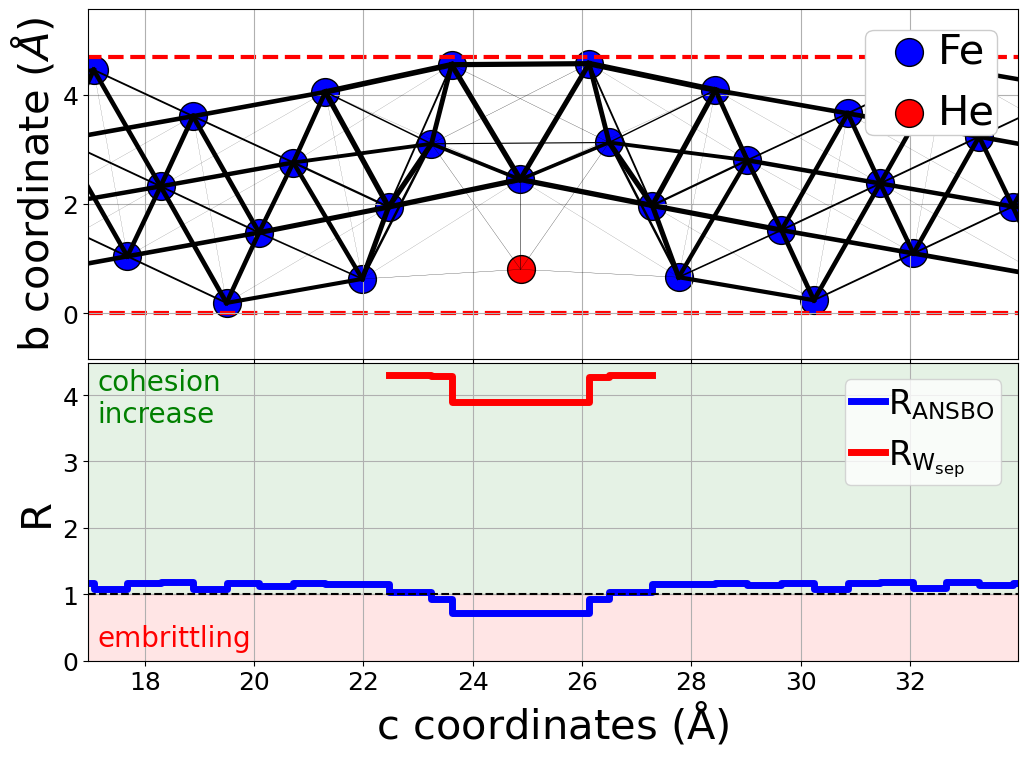

In [33]:
from FeGB_PtableSeg.chargemol import ChargemolAnalysis, get_ANSBO_all_cleavage_planes, get_unique_values_in_nth_value
# Assuming 'ca.struct' and 'ca.bond_matrix' are previously defined objects

ca = ChargemolAnalysis("./Data/S11-RA110-S3-32-He-19/")
job_df = df[df["job_name"] == "S11_RA110_S3_32_He_19"]

structure = ca.struct
projection_axis = [2, 1]  # Adjusted for Python's 0-based indexing
bond_matrix = ca.bond_matrix
atom_size = 400
figsize = (12, 12)  # Adjusted size to fit the layout better
cell_border_colour = "r"
atom_colour_dict = {"Fe": "b", "He": "r"}
fontsize = 16

# Creating subplots with reduced vertical spacing
fig, axs = plt.subplots(2, figsize=figsize, gridspec_kw={'height_ratios': [3, 1], 'hspace': -0.45})
legend_handled = set()  # Set to keep track of species already added to the legend
# Plotting each atom in the structure on the first subplot (axs[0])
for site in structure:
    species = site.species_string
    color = atom_colour_dict.get(species, 'gray')  # Default color changed to gray for visibility
    if species not in legend_handled:
        # Add the species to the legend only if it hasn't been added before
        axs[0].scatter(site.coords[projection_axis[0]], site.coords[projection_axis[1]],
                       color=color, s=atom_size, edgecolors='black', label=species)
        legend_handled.add(species)
    else:
        # Plot without adding to the legend
        axs[0].scatter(site.coords[projection_axis[0]], site.coords[projection_axis[1]],
                       color=color, s=atom_size, edgecolors='black')

# Plotting bonds on the first subplot (axs[0])
if bond_matrix is not None:
    for idx, bond in bond_matrix.iterrows():
        if bond['repeata'] == 0 and bond['repeatb'] == 0:
            atom1 = int(bond["atom1"]) - 1
            atom2 = int(bond["atom2"]) - 1
            bondstrength = np.round(bond["final_bond_order"], 2)
            axs[0].plot([structure[atom1].coords[projection_axis[0]], structure[atom2].coords[projection_axis[0]]],
                        [structure[atom1].coords[projection_axis[1]], structure[atom2].coords[projection_axis[1]]],
                        '-', color="k", linewidth=bondstrength / 0.56 * 5)

# Adjusting plot limits based on atom positions
x_coords = [site.coords[projection_axis[0]] for site in structure]
y_coords = [site.coords[projection_axis[1]] for site in structure]
x_min, x_max = min(x_coords) + 5, max(x_coords) - 5
y_min, y_max = min(y_coords), max(y_coords)
axs[0].set_xlim(x_min - 1, x_max + 1) 
axs[0].set_ylim(y_min - 1, y_max + 1)

# Draw the cell border on the first subplot (axs[0])
rect = plt.Rectangle((0, 0), structure.lattice.abc[projection_axis[0]], structure.lattice.abc[projection_axis[1]],
                     edgecolor=cell_border_colour, linewidth=3, fill=False, linestyle='--')
axs[0].add_patch(rect)

# Setting plot details for the first subplot
# axs[0].set_title('Projection of the Cell', fontsize=fontsize)
# axs[0].set_xlabel(f'Axis {projection_axis[0]+1} Coordinate', fontsize=12)
axs[0].set_ylabel(r'b coordinate ($\AA$)', fontsize=30)
axs[0].set_aspect('equal')
axs[0].grid(True)
axs[0].tick_params(axis='y', labelsize=18)
axs[0].tick_params(axis='x', labelsize=18)
axs[0].legend(fontsize=30, loc="upper right")
ANSBO_values = get_ANSBO_all_cleavage_planes(structure, bond_matrix, max(projection_axis))
atomic_layer_coords = get_unique_values_in_nth_value(structure.cart_coords, max(projection_axis), tolerance=0.1)

x_lines = []
y_lines = []
ANSBO_pure = 0.15365279
for i, value in enumerate((np.array(ANSBO_values[1]) - ANSBO_pure) / ANSBO_pure + 1):
    x_lines.extend([atomic_layer_coords[i], atomic_layer_coords[i+1]])
    y_lines.extend([value, value])
    x_lines.append(atomic_layer_coords[i+1])
    y_lines.append(value)
    
axs[1].plot(x_lines, y_lines, color="b", label=r'R$_{\rm{ANSBO}}$', linewidth=5)  # Using labels for legend

# Get the original data array
original_data = np.array(job_df.iloc[0].R_Wsep_RGS_lst_aligned)

# This bit is only necessary because of some weirdness with the apparent symmetry 
# (not exactly, because of 2d projection of a 3d obj)
# but non-symmetric result for cleavage energy on the ends - prevents awkward questions
# Find indices of the first and last non-NaN values
non_nan_indices = np.where(~np.isnan(original_data))[0]
if non_nan_indices.size > 0:  # Check if there are any non-NaN values
    first_non_nan = non_nan_indices[0]
    last_non_nan = non_nan_indices[-1]

    # Set the first and last non-NaN values to NaN
    original_data[first_non_nan] = np.nan
    original_data[last_non_nan] = np.nan

# Now original_data has NaNs at the first and last non-NaN positions
# Use this data for plotting
x_lines = []
y_lines = []
for i, value in enumerate(original_data):
    x_lines.extend([atomic_layer_coords[i], atomic_layer_coords[i+1]])
    y_lines.extend([value, value])
    x_lines.append(atomic_layer_coords[i+1])
    y_lines.append(value)

# Plot the modified data
axs[1].plot(x_lines, y_lines, "r-", label=r'R$_{\rm{W}_{\rm{sep}}}$', linewidth=5)

axs[1].axhline(1, color="k", linestyle ='--')

# Adding legend to the plot, removing individual y-axis labels
axs[1].legend(fontsize = 30)
axs[1].set_xlim(x_min - 1, x_max + 1)
# Ensure the x-axis is appropriately labeled
axs[1].set_xlabel(r'c coordinates ($\rm{\AA}$)', fontsize=30)
axs[1].grid(True)
axs[1].tick_params(axis='y', labelsize=18)
axs[1].tick_params(axis='x', labelsize=18)

# Enhance legend appearance
legend_properties = { 
    # 'handletextpad': 0.1,  # Reduces the space between the marker and text
    'borderpad': 0.05,  # Reduces padding inside the border
    'framealpha': 1  # Sets transparency of the background
}

# Apply legend enhancements to both subplots
axs[0].legend(loc="upper right", handletextpad = -0.3, fontsize = 30, borderpad = 0.05, framealpha=1)
axs[1].legend(handletextpad = 0.1,  fontsize = 24, handlelength = 1, borderpad = 0.2)

# Shading areas on the second subplot above and below a threshold
x_fill = np.array(atomic_layer_coords)
y1_fill = np.ones_like(x_fill)  # Line at y=1
y2_fill = y_lines  # Dynamic data
axs[1].set_ylim(0, None)
# Preserve original y-limits before shading
original_ylim = axs[1].get_ylim()

# Shade above y=1 in green, below y=1 in red for the second subplot
axs[1].axhspan(1, original_ylim[1]+100, color='green', alpha=0.1)  # Shade above y=1
axs[1].axhspan(original_ylim[0]-100, 1, color='red', alpha=0.1)  # Shade below y=1

# Reset y-limits to original after shading
axs[1].set_ylim(original_ylim)

axs[1].text(0.01, 0.05, "embrittling", transform=axs[1].transAxes, fontsize=20, color='r')
axs[1].text(0.01, 0.8, "cohesion\nincrease", transform=axs[1].transAxes, fontsize=20, color='g')
axs[1].set_ylabel("R", fontsize=30)

# Supplementary Information plots

# Bonus plots

## Summed bond order in the bulk 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


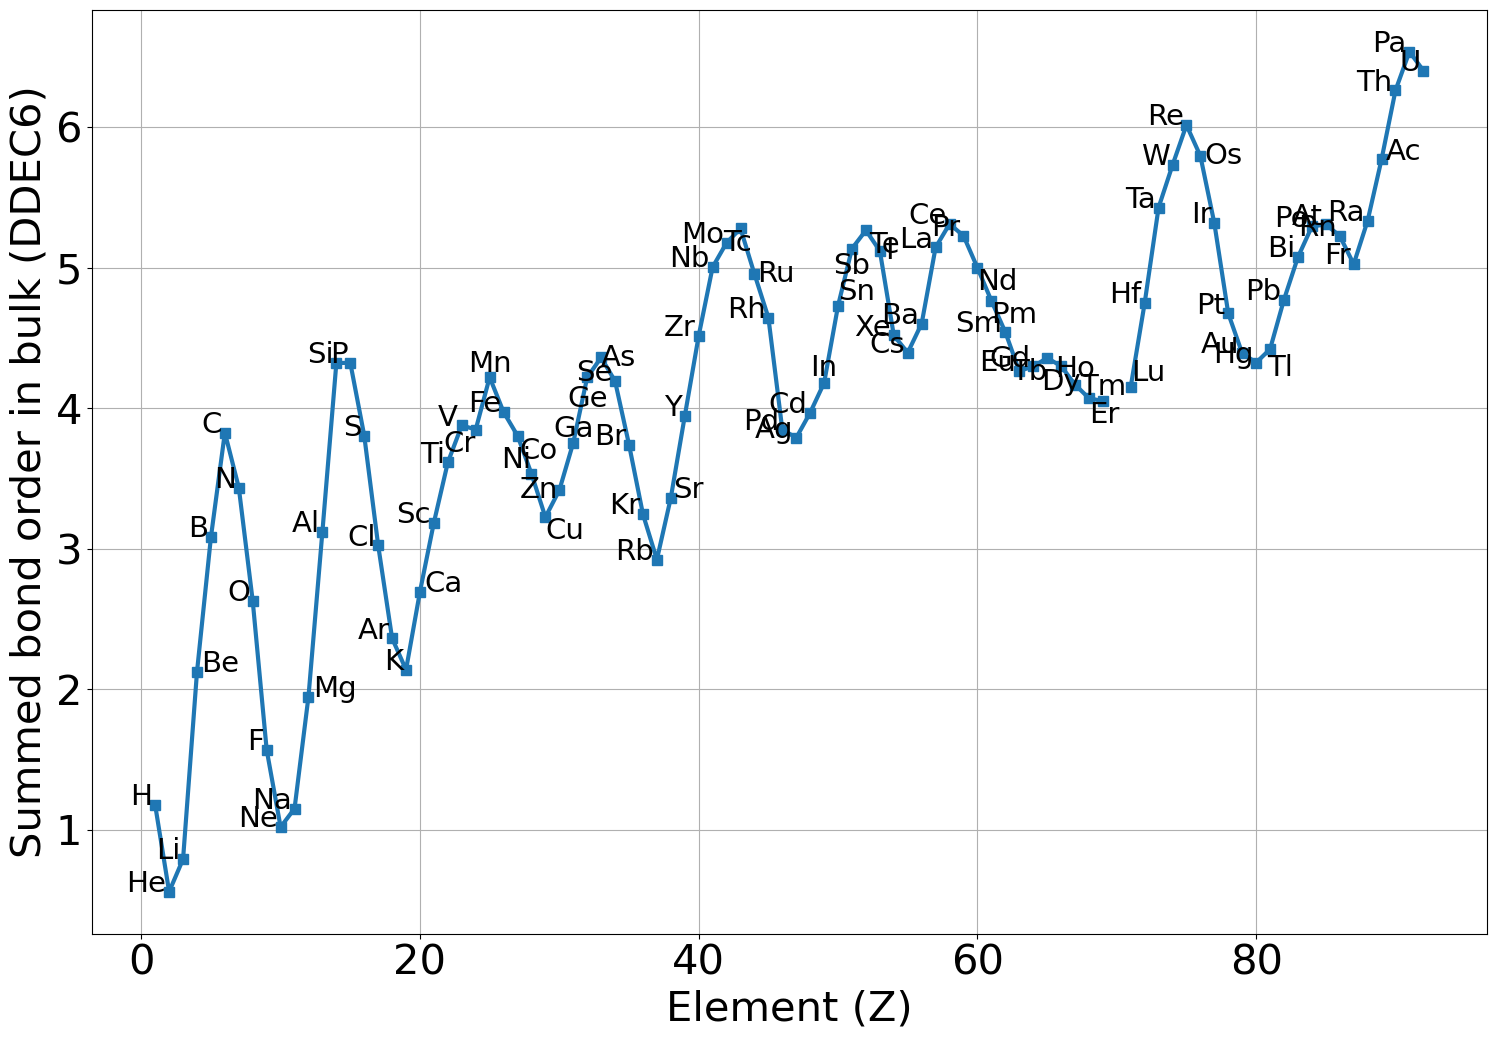

In [34]:
column = "summed_DDEC6_bond_order"
# Plotting column against 'Z'
plt.figure(figsize=(18, 12))
plt.plot(bulk_df['Z'], bulk_df[column], marker='s', linewidth = 3, markersize=7)

# Adding a horizontal line
# plt.axhline(y=11.356932331342922, color='r', linestyle='--', label='Fe BCC bulk')
# plt.text(92, 11.356932331342922-0.2, "Fe BCC = 11.35 Å³", fontsize=30, ha='right')

#Labeling points on the plot below each point
element_fontsize = 21
for idx, row in bulk_df.iterrows():
    if row.element == "Mg":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Be":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Ca":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "V":
        plt.text(row['Z']-0.3, row[column], row['element'], fontsize=element_fontsize, ha='right')
    elif row.element == "Cr":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top', ha="right")
    elif row.element == "Mn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="center")
    elif row.element == "Co":
        plt.text(row['Z']+0.1, row[column]-0.01, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Cu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ni":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="right")
    elif row.element == "Zn":
        plt.text(row['Z']-0.1, row[column], row['element'], fontsize=element_fontsize, va='center', ha="right")
    elif row.element == "Ga":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha='center')
    elif row.element == "Ge":
        plt.text(row['Z'], row[column]-0.05, row['element'], fontsize=element_fontsize, va='top', ha='center')
    elif row.element == "As":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Sr":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Tc":
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ru":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va='center')
    elif row.element == "In":
        plt.text(row['Z'], row[column]+0.05, row['element'], fontsize=element_fontsize, ha='center')
    elif row.element == "Sn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='bottom')
    elif row.element == "Sb":
        plt.text(row['Z'], row[column]-0.02, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Te":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "I":
        plt.text(row['Z']+0.4, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Nd":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Pm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Tb":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='right', va="top")
    elif row.element == "Dy":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ho":
        plt.text(row['Z'], row[column]+0.015, row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Er":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "Tm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Lu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="bottom")
    elif row.element == "Os":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Tl":
        plt.text(row['Z']-0.2, row[column]-0.03, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ac":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    else:
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='right')

# Adding labels, title, and grid
plt.xlabel("Element (Z)", fontsize=30)
plt.ylabel("Summed bond order in bulk (DDEC6)", fontsize=30)
# plt.title(columnvs Atomic Number (Z)", fontsize=24)
plt.grid(True)
# Adjusting tick size
plt.tick_params(axis='x', labelsize=30)  # Adjust x-tick label size
plt.tick_params(axis='y', labelsize=30)  # Adjust x-tick label size

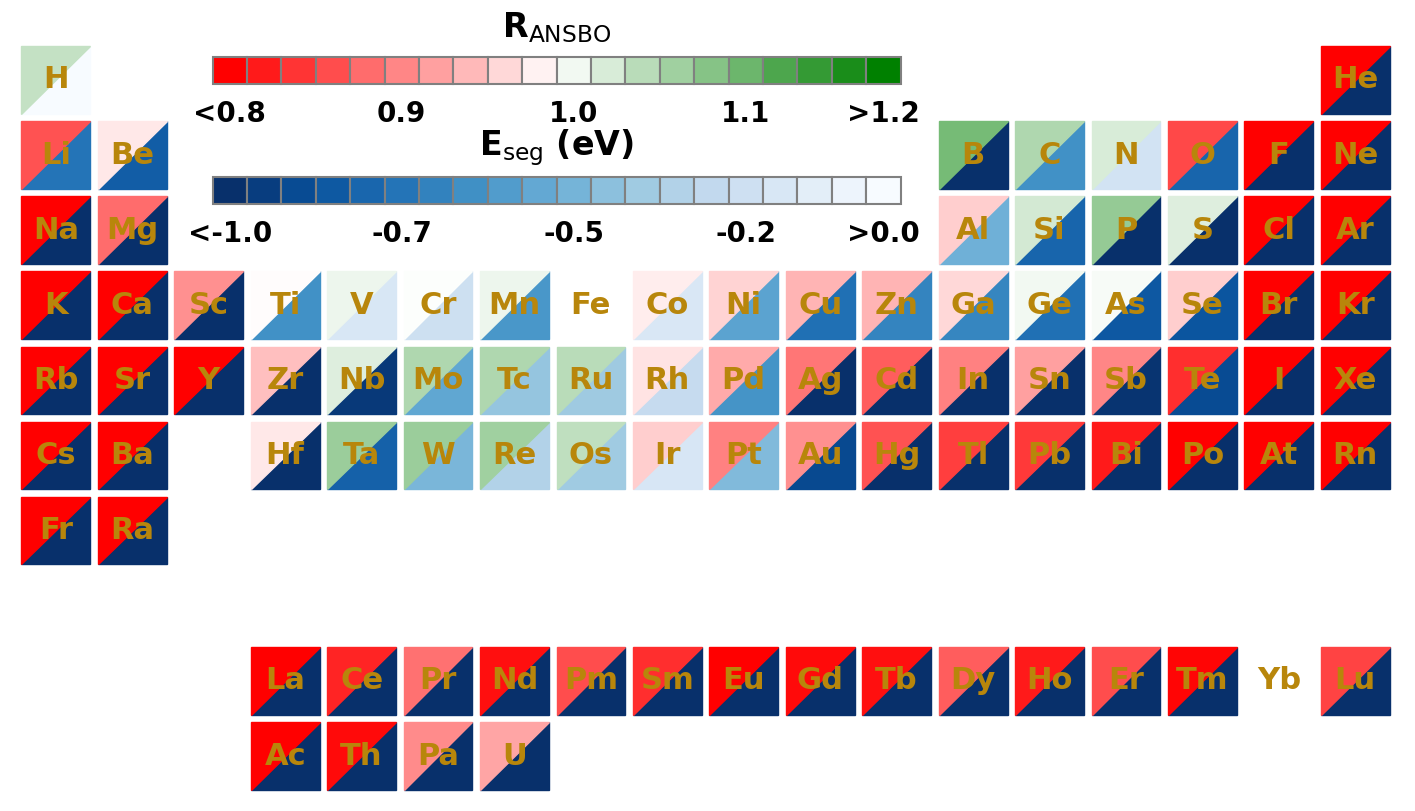

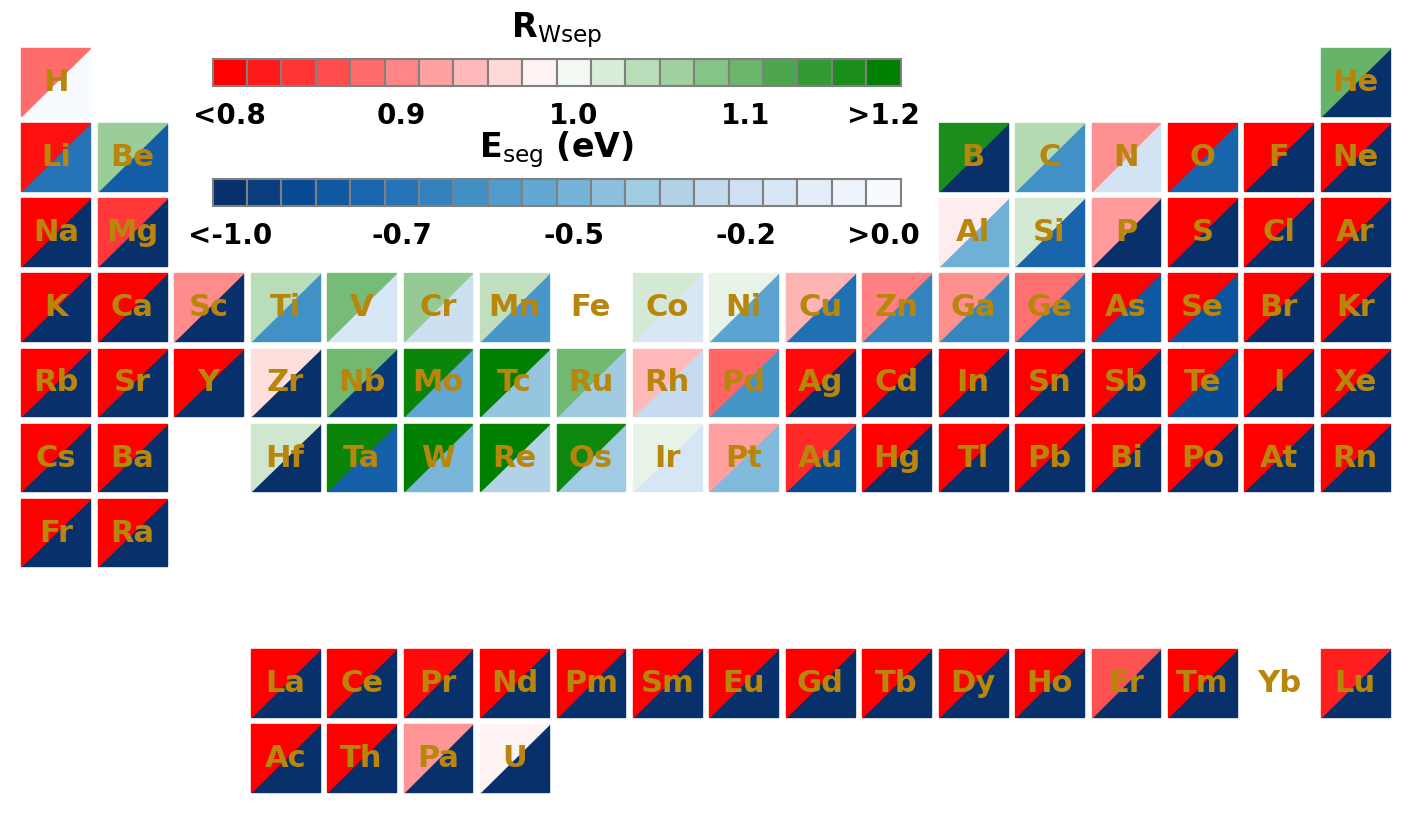

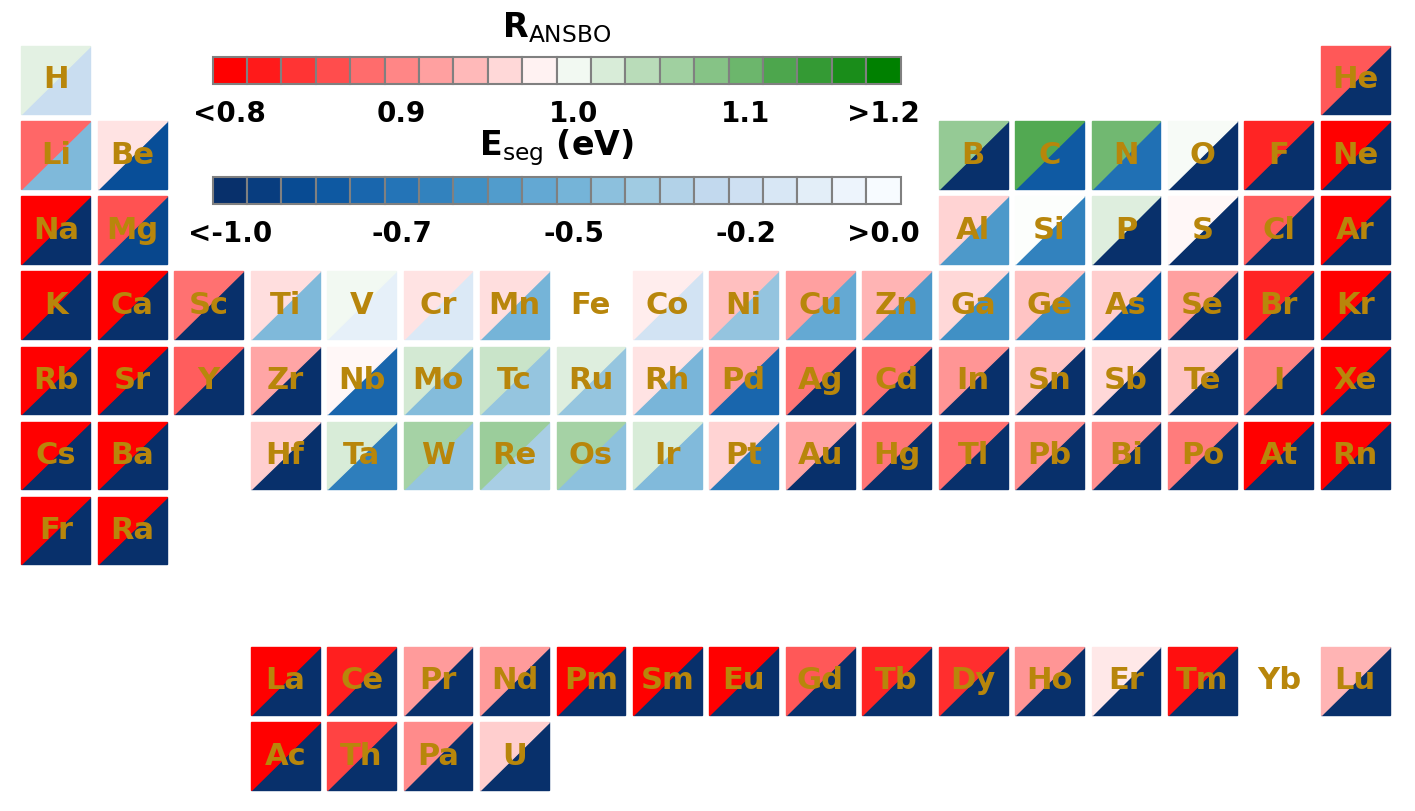

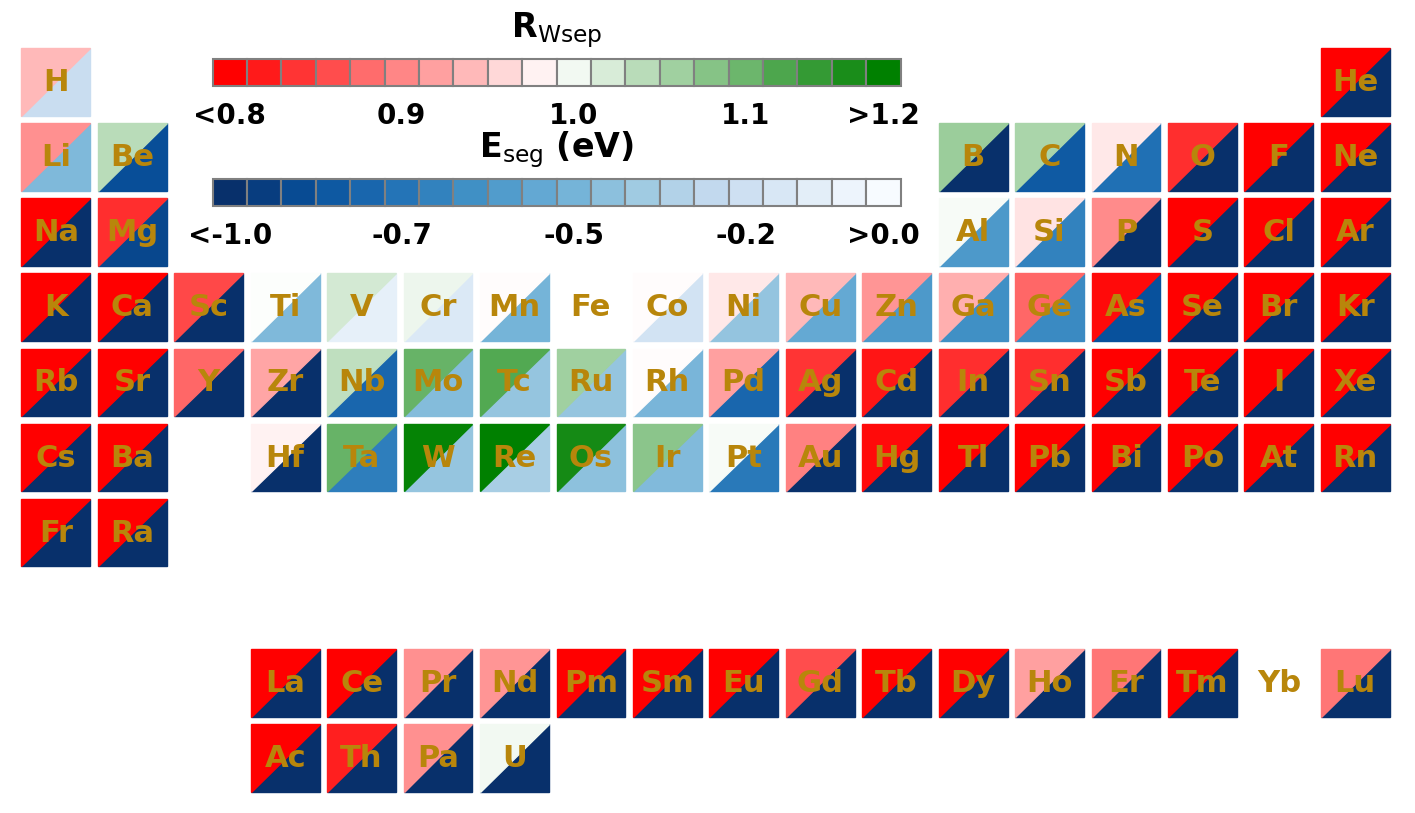

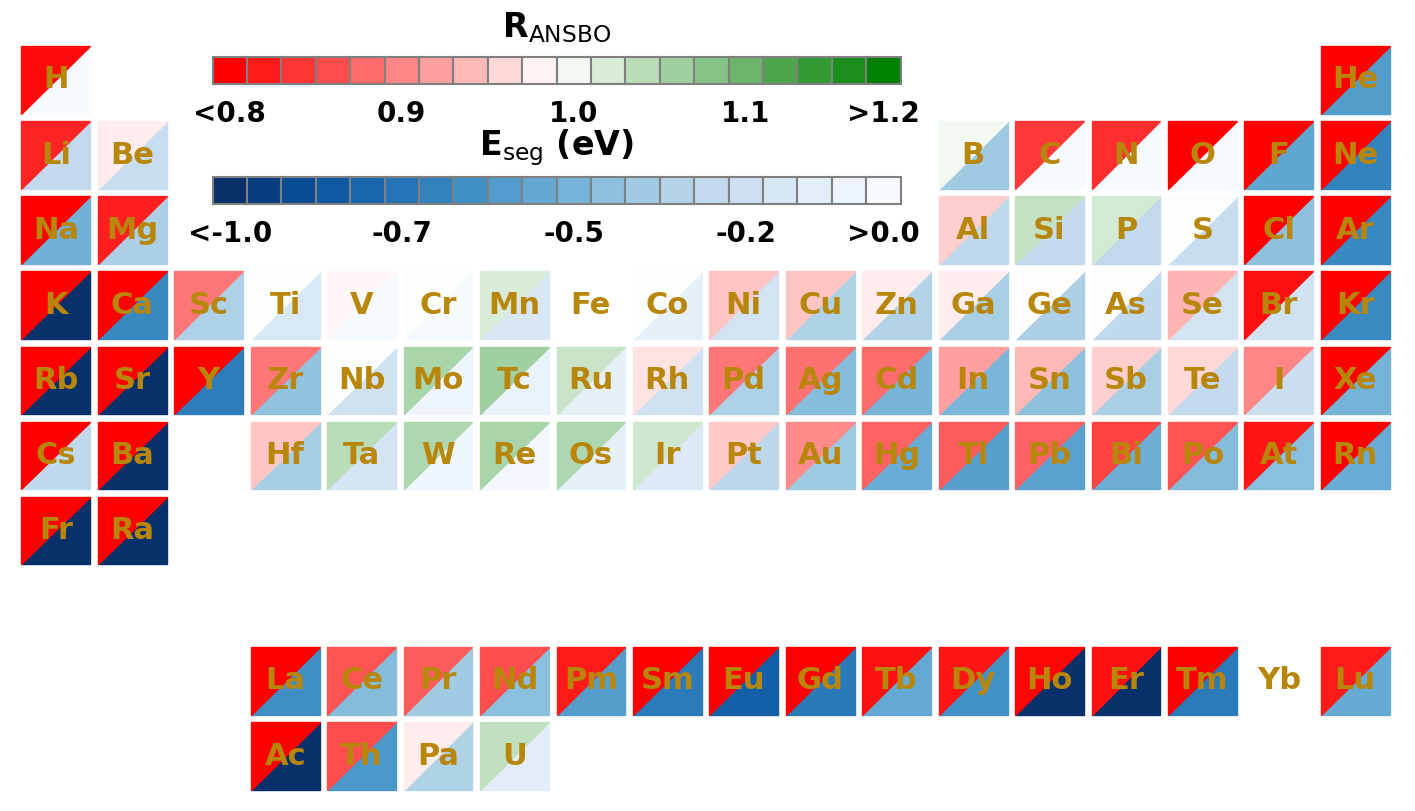

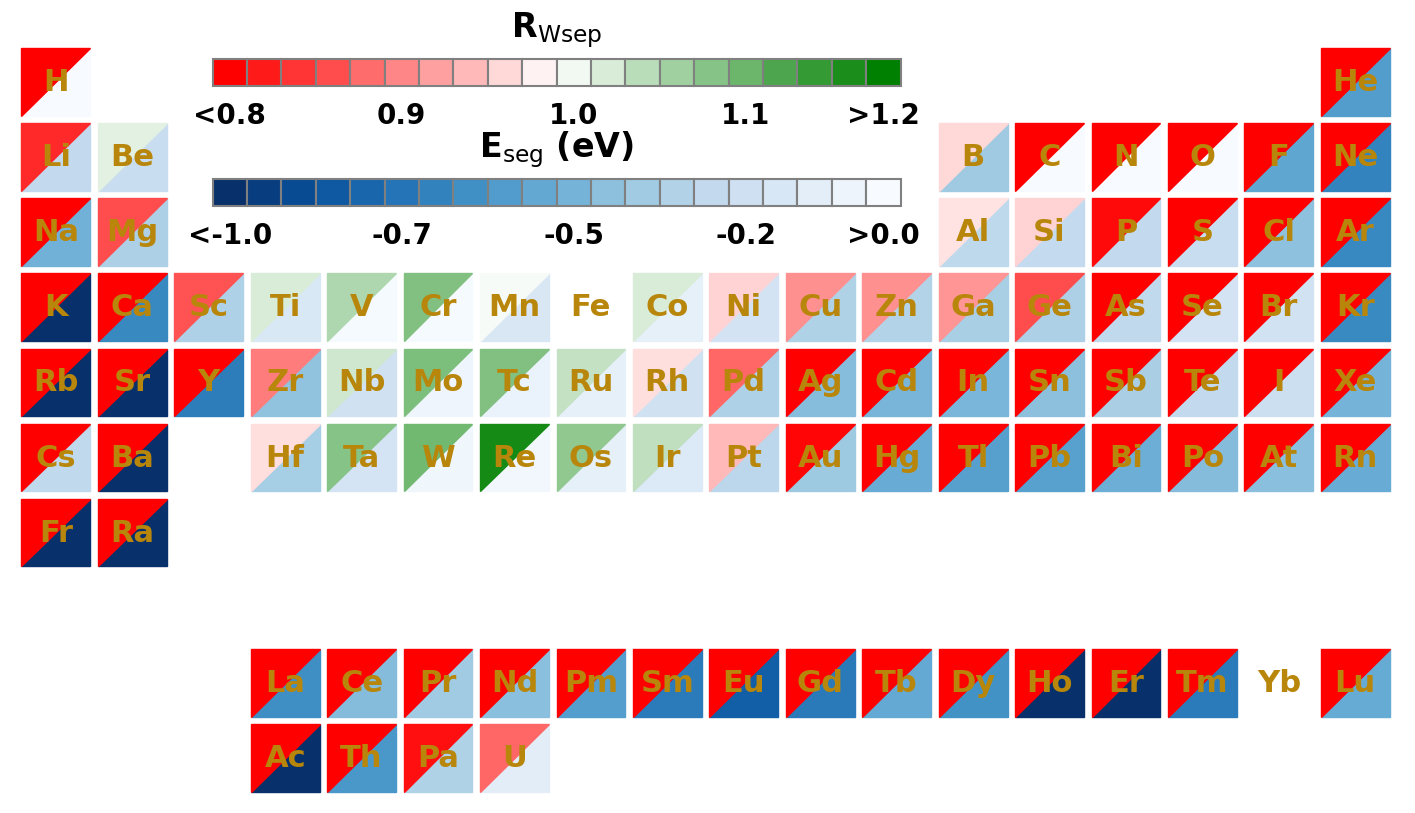

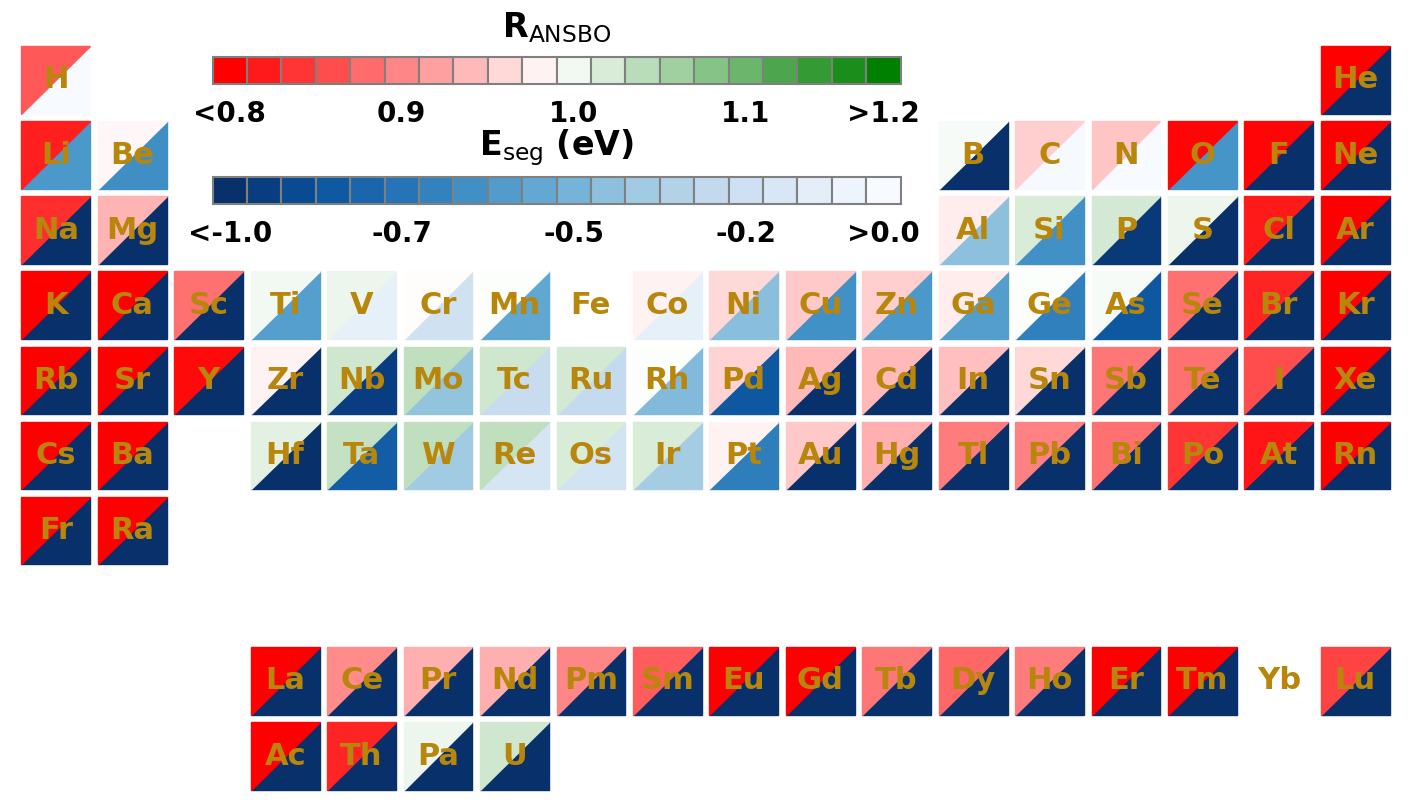

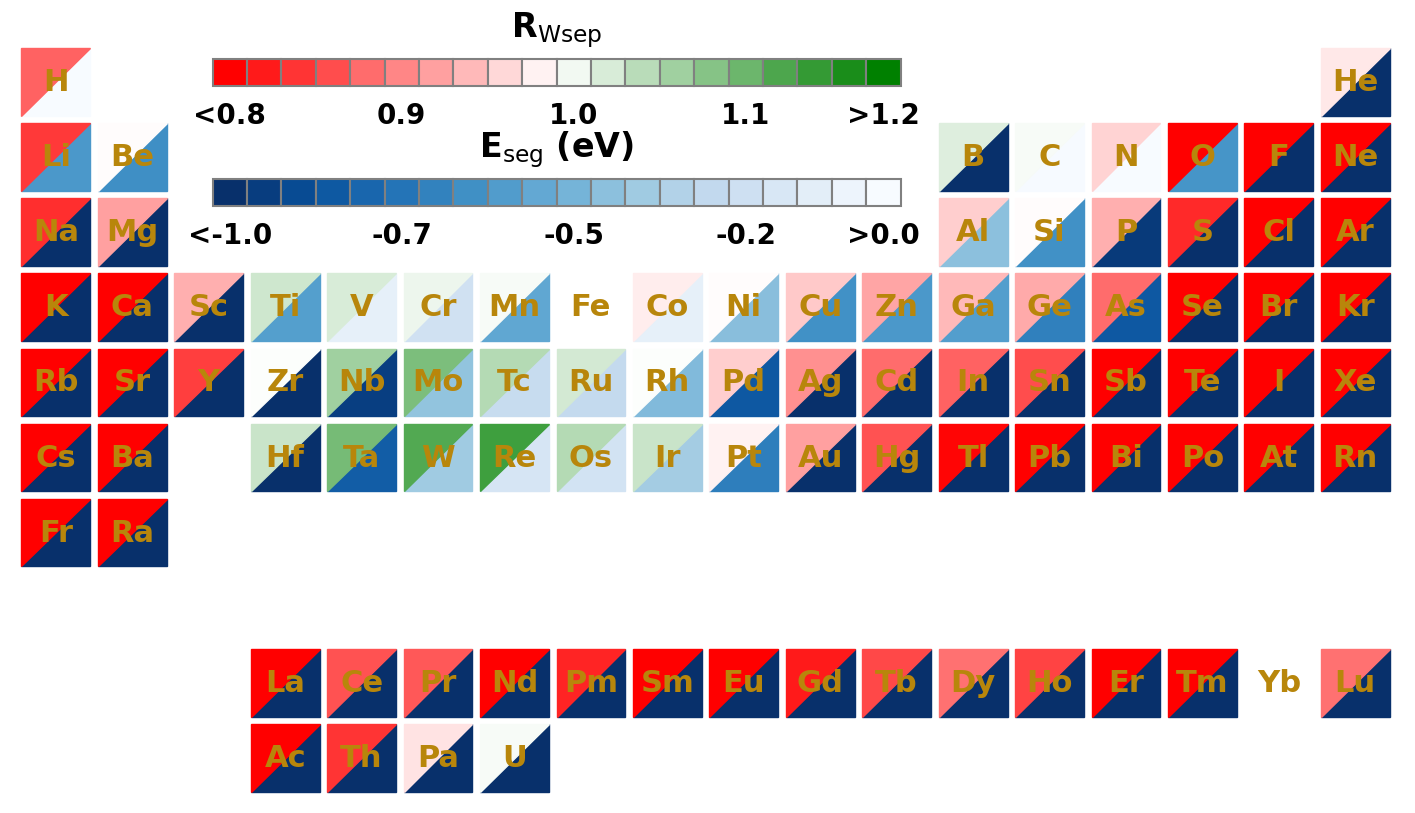

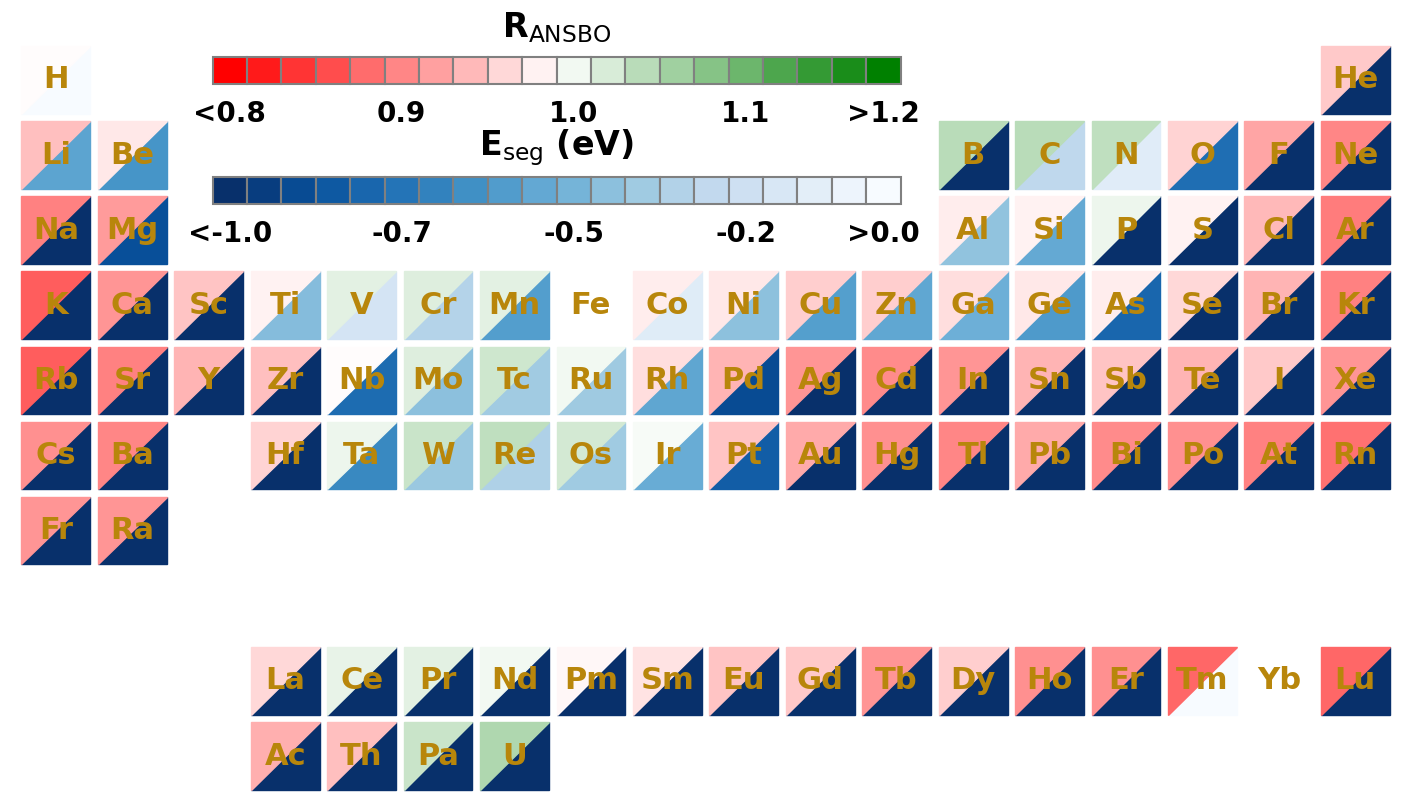

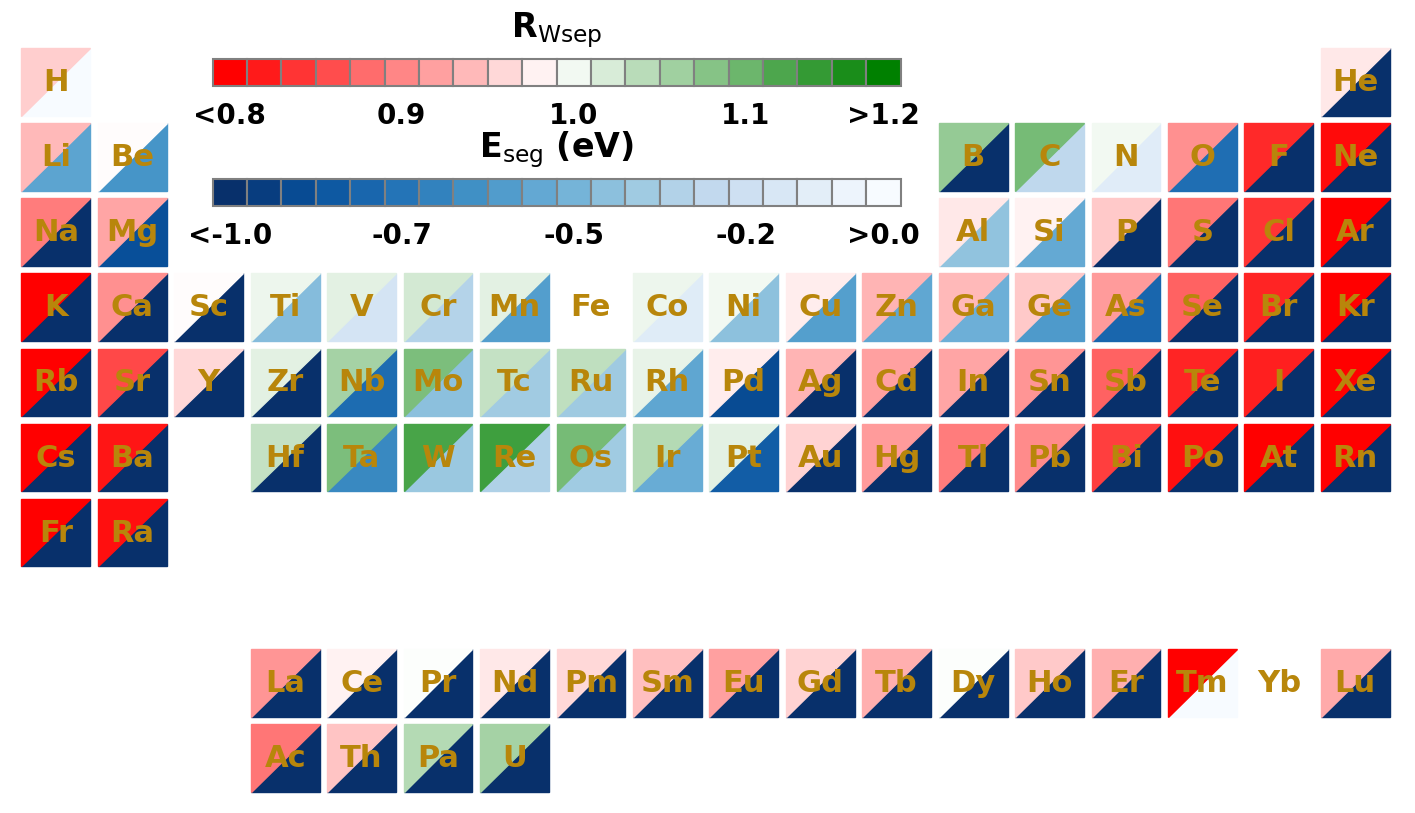

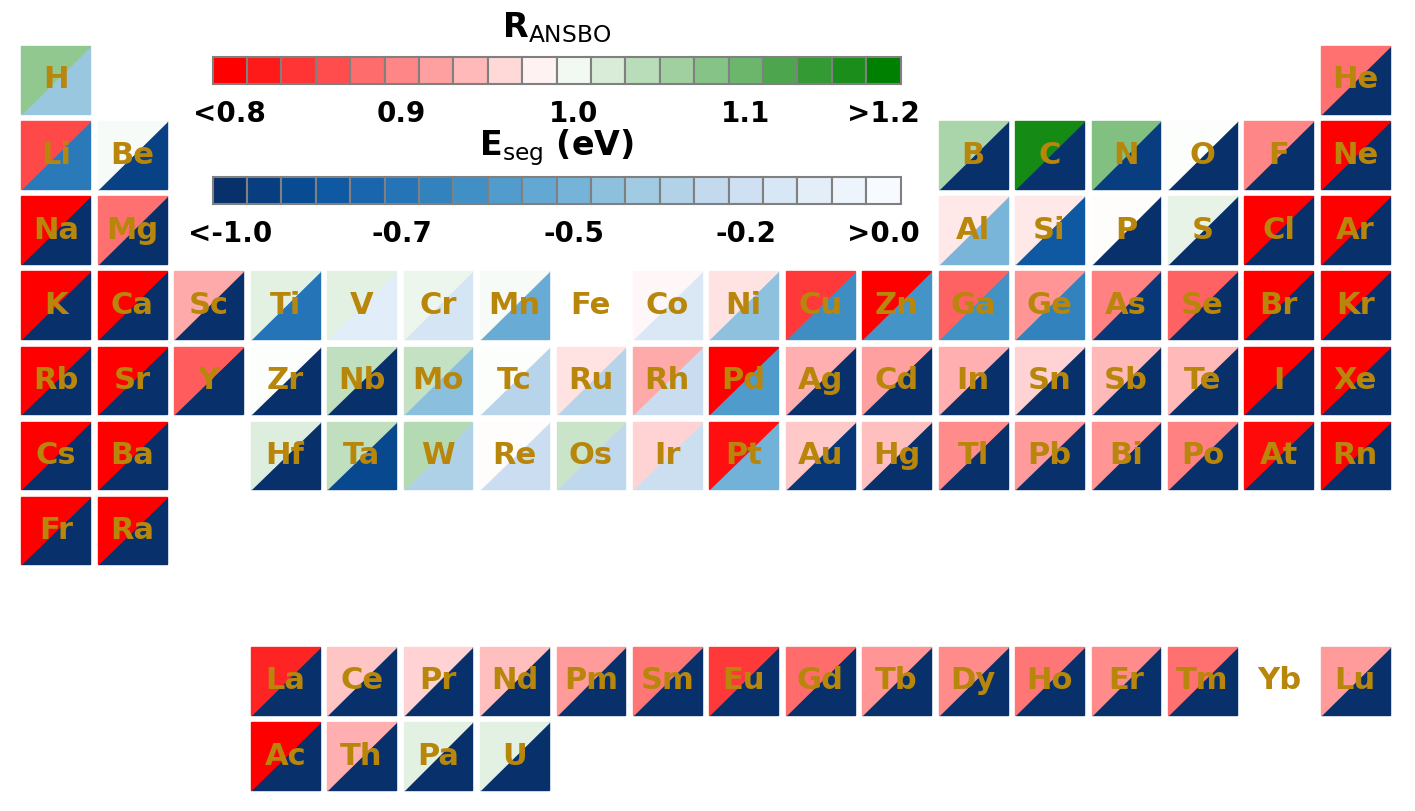

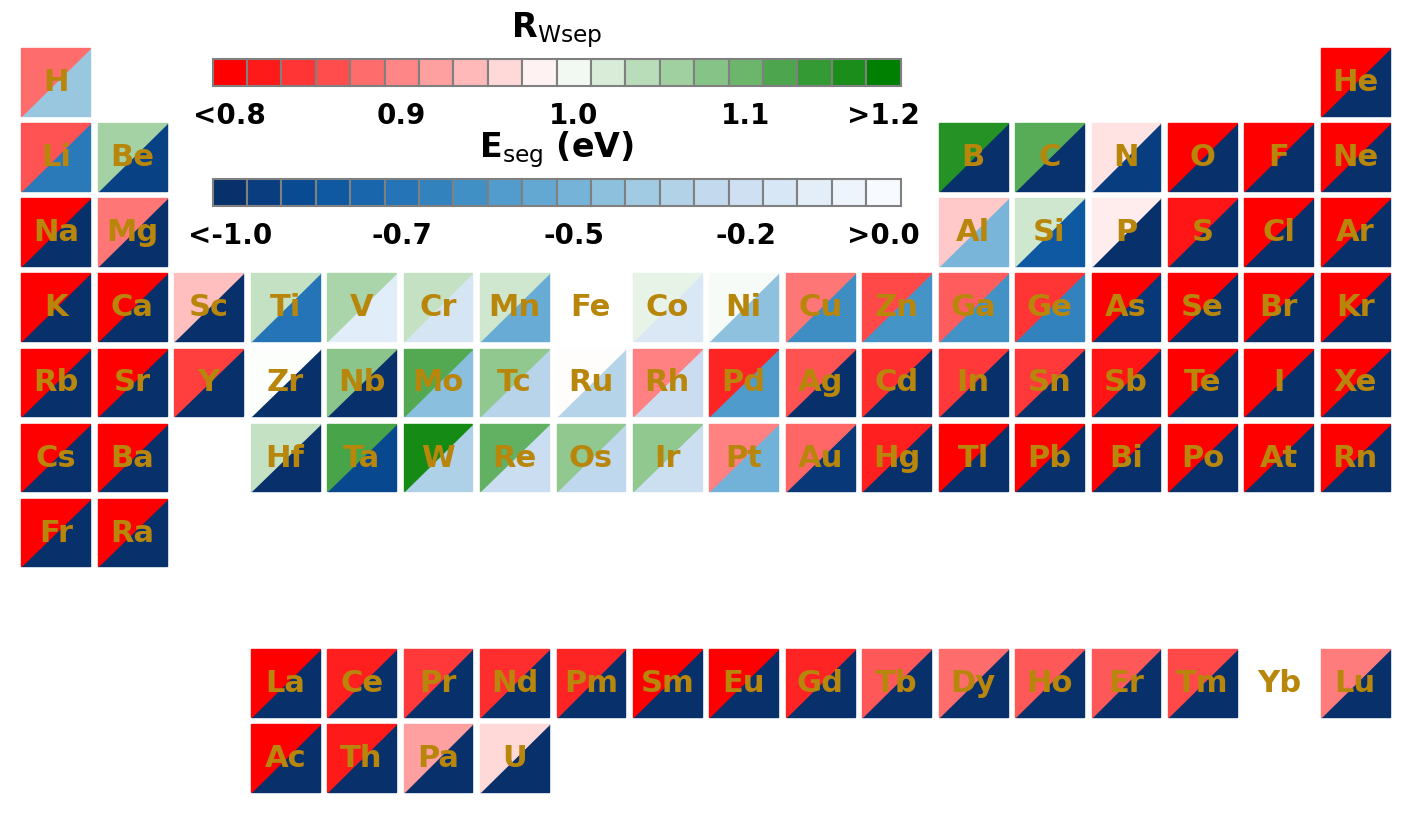

In [35]:
from matplotlib.colors import LinearSegmentedColormap
from utils.periodic_table import periodic_table_dual_plot
# Define the colors
colors = ["red", "white", "green"]  # Start with red, pass through white, end with green
n_bins = [3]  # Number of bins in each color

# Create the colormap
cmap_name = 'red_white_green'
cm_coh = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)  # Increase N for smoother transitions

min_Eseg_df = []
for gb, gb_df in df.groupby("GB"):
    # First, find the row indices of the minimum "E_seg" within each "Element" group
    idx_min_E_seg_per_element = gb_df.groupby('element')['E_seg'].idxmin()
    # Use these indices to select the corresponding rows from the original DataFrame
    min_E_seg_GB_df = df.loc[idx_min_E_seg_per_element].reset_index(drop=True)
    min_Eseg_df.append(min_E_seg_GB_df)

min_Eseg_perGB_df = pd.concat(min_Eseg_df)
# Define the colors for the colormap (Red, White, Green)
colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]  # R -> W -> G
n_bins = 100  # Number of bins in the colormap

for gb, gb_df in min_Eseg_perGB_df.groupby("GB"):
    fig, ax = periodic_table_dual_plot(gb_df, 
                                property1="E_seg",
                                property2="R_DDEC6_ANSBO",
                                cmap1=cm.Blues_r,
                                cmap2=cm_coh,
                                center_cm_zero1=False,
                                center_point2=1,
                                element_font_color="darkgoldenrod",
                                count_min1 = -1,
                                count_max1 = 0,
                                count_min2 = 0.8,
                                count_max2 = 1.2,
                                property_name1=r"E$_{\rm{seg}}$ (eV)",
                                property_name2 = r"R$_{\rm{ANSBO}}$")

    fig, ax = periodic_table_dual_plot(gb_df, 
                                property1="E_seg",
                                property2="R_Wsep_RGS",
                                cmap1=cm.Blues_r,
                                cmap2=cm_coh,
                                center_cm_zero1=False,
                                center_point2=1,
                                element_font_color="darkgoldenrod",
                                property_name1=r"E$_{\rm{seg}}$ (eV)",
                                property_name2 = r"R$_{\rm{Wsep}}$",
                                count_min1 = -1,
                                count_max1 = 0,
                                count_min2 = 0.8,
                                count_max2 = 1.2
                                )
